### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

###  Defining Functions

In [2]:
from sklearn import metrics

def print_all_metrics(actual, probs):
    # Confusion matrix 
    confusion = metrics.confusion_matrix(actual, probs )
    print("\nThe confusion matrix of the model is:")
    print(confusion)

    # Checking the overall accuracy.
    print("\nThe overall accuracy of the model is:",metrics.accuracy_score(actual, probs))

    ## Other Metrics
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # calculating sensitivity of the model
    print("\nSensitivity = ",TP / float(TP+FN))

    # calculating specificity of the model
    print("Specificity = ",TN / float(TN+FP))

    # Calculating the false positive rate - predicting churn when customer does not have churned
    print("False Positive Rate = ",FP/ float(TN+FP))

    # Calculating the positive predictive value or Precision
    print ("Precision = ",TP / float(TP+FP))
    
    # Calculating the Negative predictive value
    print ("True Negative Prediction Rate = ",TN / float(TN+ FN))
    

### READING AND UNDERSTANDING THE DATA

In [3]:
# read data
telecomDF = pd.read_csv("telecom_churn_data.csv")

In [4]:
# look at initial rows of the data
telecomDF.head(3)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN            0.0   
1        304.76         53.76            0.0            0.0            0.0   
2        208.36        118.91            0.0            0.0            0.0   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN            0.0            NaN   
1           0.00            0.0            0.0            0.0           0.00   
2          38.49            0.0            0.0            0.0          70.94   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1              4.11              0.00              0.00              0.00   
2             26.49             22.58              8.76             41.81   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.46              0.13              0.00              0.00   
2             67.41             75.53              9.28              1.48   

   std_og_t2f_mou_

In [5]:
# feature type summary
telecomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telecomDF.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
# Checking data types
telecomDF.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [8]:
telecomDF.shape

(99999, 226)

### NULL VALUES IMPUTATION/HANDLING

In [9]:
# Let us first extract list of columns containing recharge amount
amt_recharge_columns =  telecomDF.columns[telecomDF.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [10]:
# look at missing value ratio in each column
round((telecomDF.isnull().sum()*100/len(telecomDF.index)),2)[round(telecomDF.isnull().sum()/
                                                                 len(telecomDF.index),2).values>0.00]

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

In [11]:
telecomDF.loc[:,amt_recharge_columns].describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

Since null value in recharge columns equivalent to 0 recharge amount, it can be imputed with 0.

In [12]:
telecomDF['total_rech_data_6'] = telecomDF['total_rech_data_6'].replace(np.NaN,0.0)
telecomDF['total_rech_data_7'] = telecomDF['total_rech_data_7'].replace(np.NaN,0.0)
telecomDF['total_rech_data_8'] = telecomDF['total_rech_data_8'].replace(np.NaN,0.0)
telecomDF['total_rech_data_9'] = telecomDF['total_rech_data_9'].replace(np.NaN,0.0)

In [13]:
telecomDF['av_rech_amt_data_6'] = telecomDF['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecomDF['av_rech_amt_data_7'] = telecomDF['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecomDF['av_rech_amt_data_8'] = telecomDF['av_rech_amt_data_8'].replace(np.NaN,0.0)
telecomDF['av_rech_amt_data_9'] = telecomDF['av_rech_amt_data_9'].replace(np.NaN,0.0)

### CREATING NEW/DERIVED FEATURES

In [14]:
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
telecomDF['total_rech_amt_data_6'] = telecomDF.av_rech_amt_data_6 * telecomDF.total_rech_data_6
telecomDF['total_rech_amt_data_7'] = telecomDF.av_rech_amt_data_7 * telecomDF.total_rech_data_7
telecomDF['total_rech_amt_data_8'] = telecomDF.av_rech_amt_data_8 * telecomDF.total_rech_data_8
telecomDF['total_rech_amt_data_9'] = telecomDF.av_rech_amt_data_9* telecomDF.total_rech_data_9


In [15]:
# Taking the avg recharge for the good phase.
telecomDF['total_avg_rech_amnt_6_7_GPhase'] = (telecomDF.total_rech_amt_6 + telecomDF.total_rech_amt_data_6 \
                                               + telecomDF.total_rech_amt_7+ telecomDF.total_rech_amt_data_7)/2

### FILTERING HIGH VALUE CUSTOMERS

In [16]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecomDF.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)

print("70 percentile of 6th and 7th months avg recharge amount: " + str(high_value_filter))

telecom_df_high_val_cust = telecomDF[telecomDF.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
print("Dataframe Shape after Filtering High Value Customers: " + str(telecom_df_high_val_cust.shape))

70 percentile of 6th and 7th months avg recharge amount: 478.0
Dataframe Shape after Filtering High Value Customers: (29953, 231)


We can see that there are 29953 high value customers

### Tag churners and remove attributes of the churn phase

- We will use the following columns to tag churners: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9.
- We will take the sum of incoming, outgoing, 2g & 3g for the month to tag 1 for churn and 0 for not churn

In [17]:
# Checking the null values in these columns
telecom_df_high_val_cust.loc[:,['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

Since there are no null values, we can determine churn based on these columns

In [18]:
telecom_df_high_val_cust['churn'] = np.where((telecom_df_high_val_cust.total_ic_mou_9) + (telecom_df_high_val_cust.total_og_mou_9) + (telecom_df_high_val_cust.vol_2g_mb_9) + (telecom_df_high_val_cust.vol_3g_mb_9)==0,1,0)


In [19]:
# checking churn %
100*telecom_df_high_val_cust.churn.sum()/len(telecom_df_high_val_cust)

8.122725603445398

Only 8.12% of the customers got churned.

Now we can remove the features corresponding to the churn phase i.e. month 9

In [20]:
churn_month_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('_9')]
telecom_df_high_val_cust.drop(churn_month_columns,axis=1,inplace=True)

In [21]:
telecom_df_high_val_cust.shape

(29953, 177)

#### REMOVING COLUMNS WITH HIGH % OF NULL VALUES

In [22]:
# look at missing value ratio in each column
round((telecom_df_high_val_cust.isnull().sum()*100/len(telecom_df_high_val_cust.index)),2)


mobile_number                      0.00
circle_id                          0.00
loc_og_t2o_mou                     0.74
std_og_t2o_mou                     0.74
loc_ic_t2o_mou                     0.74
last_date_of_month_6               0.00
last_date_of_month_7               0.09
last_date_of_month_8               0.55
arpu_6                             0.00
arpu_7                             0.00
arpu_8                             0.00
onnet_mou_6                        1.81
onnet_mou_7                        1.79
onnet_mou_8                        3.91
offnet_mou_6                       1.81
offnet_mou_7                       1.79
offnet_mou_8                       3.91
roam_ic_mou_6                      1.81
roam_ic_mou_7                      1.79
roam_ic_mou_8                      3.91
roam_og_mou_6                      1.81
roam_og_mou_7                      1.79
roam_og_mou_8                      3.91
loc_og_t2t_mou_6                   1.81
loc_og_t2t_mou_7                   1.79


In [23]:
# Drop Columns with > 30% of missing values
cols = telecom_df_high_val_cust.columns
telecom_df_high_val_cust_null = telecom_df_high_val_cust.isnull().sum() * 100 / len(telecom_df_high_val_cust)
telecom_df_high_val_cust_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_df_high_val_cust_null})

cols_to_drop = telecom_df_high_val_cust_null_df.loc[(telecom_df_high_val_cust_null_df["perc_null"] > 30.0)]["col_name"]

# lets drop these columns
telecom_df_high_val_cust.drop(cols_to_drop, axis=1,inplace = True)
telecom_df_high_val_cust.shape


(29953, 153)

In [24]:
round((telecom_df_high_val_cust.isnull().sum()*100/len(telecom_df_high_val_cust.index)),2)

mobile_number                     0.00
circle_id                         0.00
loc_og_t2o_mou                    0.74
std_og_t2o_mou                    0.74
loc_ic_t2o_mou                    0.74
last_date_of_month_6              0.00
last_date_of_month_7              0.09
last_date_of_month_8              0.55
arpu_6                            0.00
arpu_7                            0.00
arpu_8                            0.00
onnet_mou_6                       1.81
onnet_mou_7                       1.79
onnet_mou_8                       3.91
offnet_mou_6                      1.81
offnet_mou_7                      1.79
offnet_mou_8                      3.91
roam_ic_mou_6                     1.81
roam_ic_mou_7                     1.79
roam_ic_mou_8                     3.91
roam_og_mou_6                     1.81
roam_og_mou_7                     1.79
roam_og_mou_8                     3.91
loc_og_t2t_mou_6                  1.81
loc_og_t2t_mou_7                  1.79
loc_og_t2t_mou_8         

In [25]:
telecom_df_high_val_cust.dtypes

mobile_number                       int64
circle_id                           int64
loc_og_t2o_mou                    float64
std_og_t2o_mou                    float64
loc_ic_t2o_mou                    float64
last_date_of_month_6               object
last_date_of_month_7               object
last_date_of_month_8               object
arpu_6                            float64
arpu_7                            float64
arpu_8                            float64
onnet_mou_6                       float64
onnet_mou_7                       float64
onnet_mou_8                       float64
offnet_mou_6                      float64
offnet_mou_7                      float64
offnet_mou_8                      float64
roam_ic_mou_6                     float64
roam_ic_mou_7                     float64
roam_ic_mou_8                     float64
roam_og_mou_6                     float64
roam_og_mou_7                     float64
roam_og_mou_8                     float64
loc_og_t2t_mou_6                  

In [26]:
telecom_df_high_val_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

### Exploring Date fields

In [27]:
date_col = telecom_df_high_val_cust.select_dtypes(include='object')

In [28]:
date_col.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  
0            6/21/2014           7/16/2014            8/8/2014  
7            6/27/2014           7/25/2014           8/26/2014  
8            6/25/2014           7/31/2014           8/30/2014  
21           6/30/2014           7/31/2014           8/31/2014  
23           6/18/2014            7/7/2014           8/24/2014

In [29]:
date_col.describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 29953                29926                29788   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  29953                29926                29788   

       date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  
count                29880               29855               29371  
unique                  30                  31                  31  
top              6/30/2014           7/31/2014           8/31/2014  
freq                  8365                7605                6191

In [30]:
#Dropping the Date Columns
telecom_df_high_val_cust.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                              'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

#### FINALLY IMPUTING MISSING VALUES WITH 0

In [31]:
telecom_df_high_val_cust = telecom_df_high_val_cust.fillna(0)

In [32]:
round((telecom_df_high_val_cust.isnull().sum()*100/len(telecom_df_high_val_cust.index)),2)

mobile_number                     0.0
circle_id                         0.0
loc_og_t2o_mou                    0.0
std_og_t2o_mou                    0.0
loc_ic_t2o_mou                    0.0
arpu_6                            0.0
arpu_7                            0.0
arpu_8                            0.0
onnet_mou_6                       0.0
onnet_mou_7                       0.0
onnet_mou_8                       0.0
offnet_mou_6                      0.0
offnet_mou_7                      0.0
offnet_mou_8                      0.0
roam_ic_mou_6                     0.0
roam_ic_mou_7                     0.0
roam_ic_mou_8                     0.0
roam_og_mou_6                     0.0
roam_og_mou_7                     0.0
roam_og_mou_8                     0.0
loc_og_t2t_mou_6                  0.0
loc_og_t2t_mou_7                  0.0
loc_og_t2t_mou_8                  0.0
loc_og_t2m_mou_6                  0.0
loc_og_t2m_mou_7                  0.0
loc_og_t2m_mou_8                  0.0
loc_og_t2f_m

There are no missing values now.

In [33]:
telecom_df_high_val_cust.shape

(29953, 147)

### EDA

#### DROPPING COLUMNS WITH SINGLE VALUES

In [34]:
for i in telecom_df_high_val_cust.columns:
    x = telecom_df_high_val_cust[i].value_counts()
    print("Column name is:",i,"and unique value is:",len(x))

Column name is: mobile_number and unique value is: 29953
Column name is: circle_id and unique value is: 1
Column name is: loc_og_t2o_mou and unique value is: 1
Column name is: std_og_t2o_mou and unique value is: 1
Column name is: loc_ic_t2o_mou and unique value is: 1
Column name is: arpu_6 and unique value is: 29029
Column name is: arpu_7 and unique value is: 29040
Column name is: arpu_8 and unique value is: 28035
Column name is: onnet_mou_6 and unique value is: 16872
Column name is: onnet_mou_7 and unique value is: 16973
Column name is: onnet_mou_8 and unique value is: 15854
Column name is: offnet_mou_6 and unique value is: 21198
Column name is: offnet_mou_7 and unique value is: 21233
Column name is: offnet_mou_8 and unique value is: 20140
Column name is: roam_ic_mou_6 and unique value is: 4045
Column name is: roam_ic_mou_7 and unique value is: 3381
Column name is: roam_ic_mou_8 and unique value is: 3431
Column name is: roam_og_mou_6 and unique value is: 4742
Column name is: roam_og_m

In [35]:
#dropping columns which will not be useful.
telecom_df_high_val_cust.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                               'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                               'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)

In [36]:
telecom_df_high_val_cust.shape

(29953, 137)

#### Analysis on Recharge amount related variables

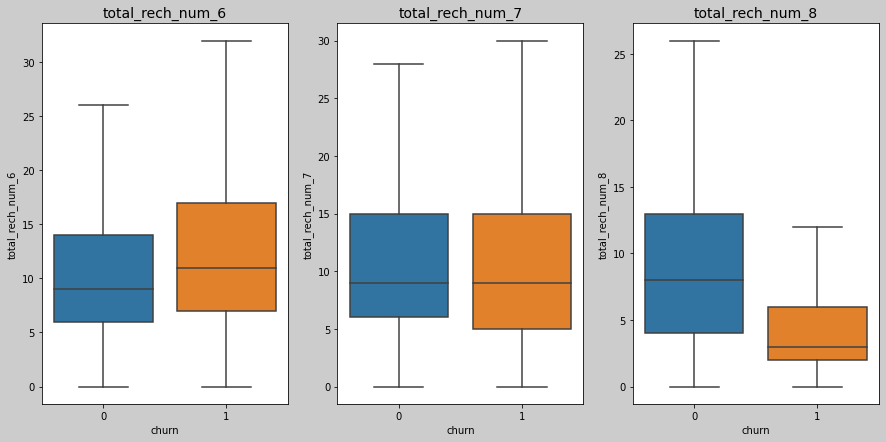

In [37]:
## total_rech_num

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_num_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_num_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_num_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_num_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_num_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_num_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe that total recharge number drops by a significant amount in the 8th month for the customers who churned.

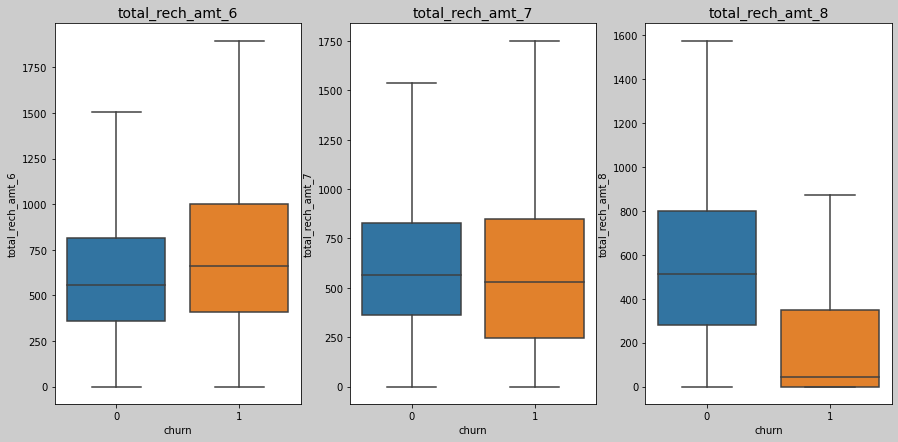

In [38]:
## total_rech_amt

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_amt_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_amt_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_amt_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_amt_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_amt_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_amt_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe that total recharge amount drops by a significant value in the 8th month for the customers who churned.

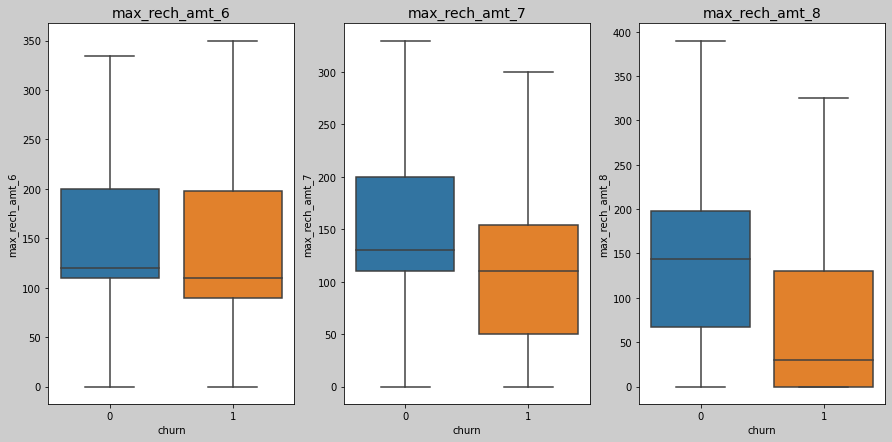

In [39]:
## max_rech_amt

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.max_rech_amt_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('max_rech_amt_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.max_rech_amt_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('max_rech_amt_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.max_rech_amt_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('max_rech_amt_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe that max recharge amount drops by a significant value in the 8th month for the customers who churned.

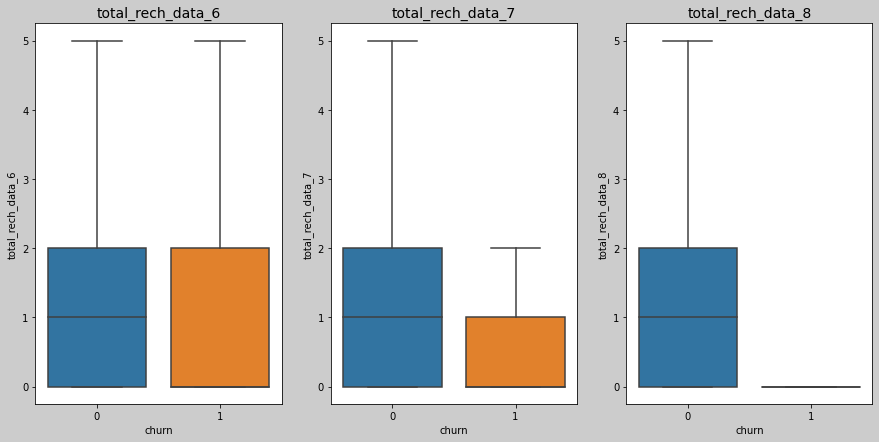

In [40]:
## Total recharge data

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_data_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_data_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_data_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_data_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.total_rech_data_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_rech_data_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe that total recharge data drops by a significant amount in the 8th month for the customers who churned.

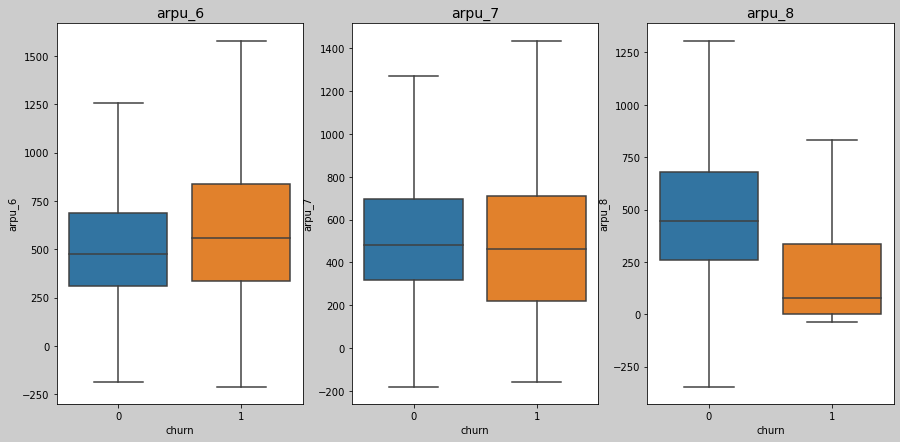

In [41]:
## avg revenue per user

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.arpu_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('arpu_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.arpu_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('arpu_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.arpu_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('arpu_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe that avg revenue per user number drops by a significant amount in the 8th month for the customers who churned.

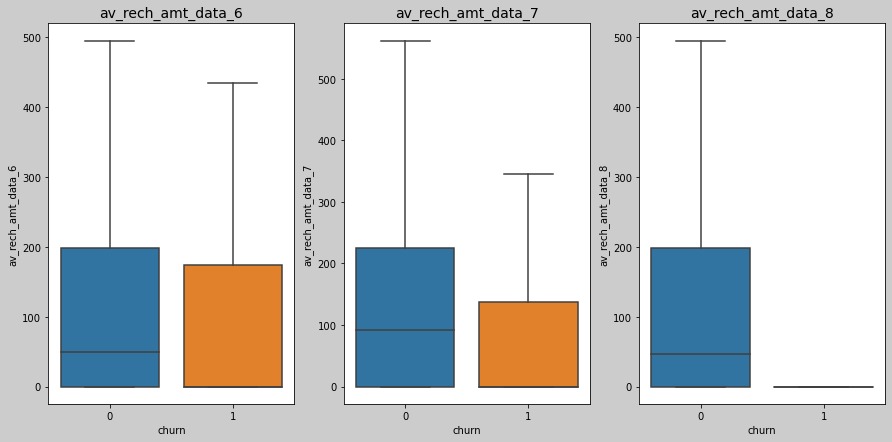

In [42]:
## Avg amount recharge data

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.av_rech_amt_data_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('av_rech_amt_data_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.av_rech_amt_data_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('av_rech_amt_data_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.av_rech_amt_data_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('av_rech_amt_data_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe that Average amount of recharge data drops by a significant amount in the 8th month for the customers who churned.

#### ANALYSING INCOMING & OUTGOING

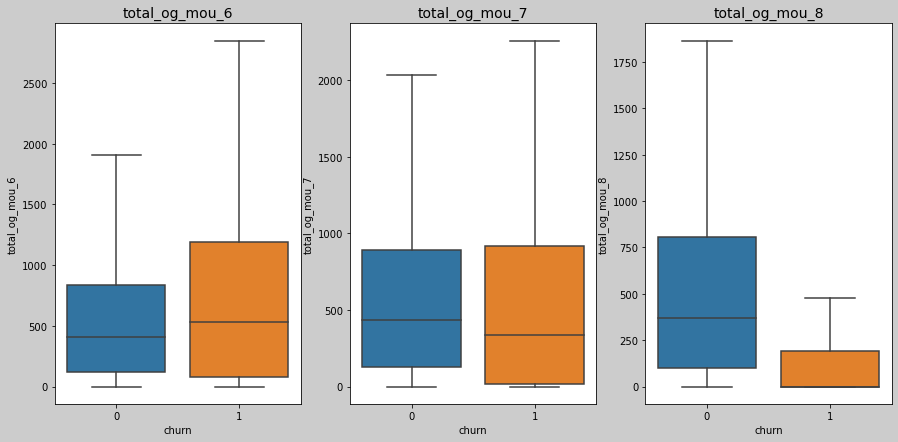

In [43]:
## Total Outgoing minutes of usage

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.total_og_mou_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_og_mou_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.total_og_mou_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_og_mou_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.total_og_mou_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_og_mou_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe the decreasing trend in this case and the Total Outgoing minutes of usage drops by a significant amount in the 8th month for the customers who churned.

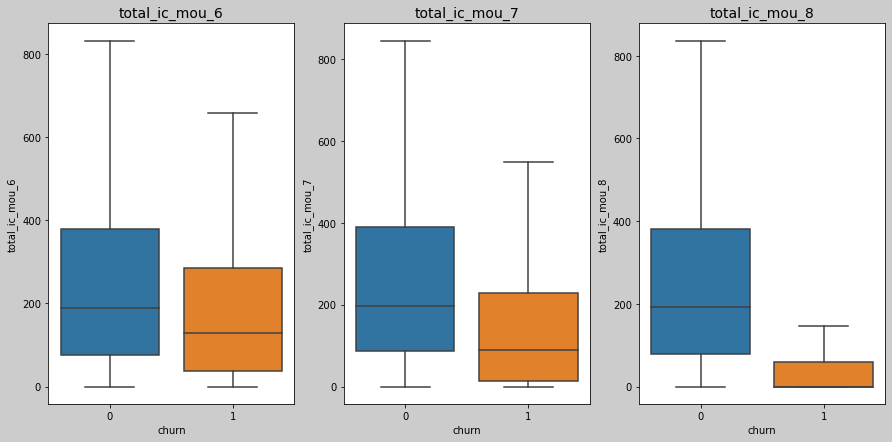

In [44]:
## Total Incoming minutes of usage

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.total_ic_mou_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_ic_mou_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.total_ic_mou_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_ic_mou_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.total_ic_mou_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('total_ic_mou_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- As expected, We can observe the decreasing trend in this case as well and the Total Incoming minutes of usage drops by a significant amount in the 8th month for the customers who churned.

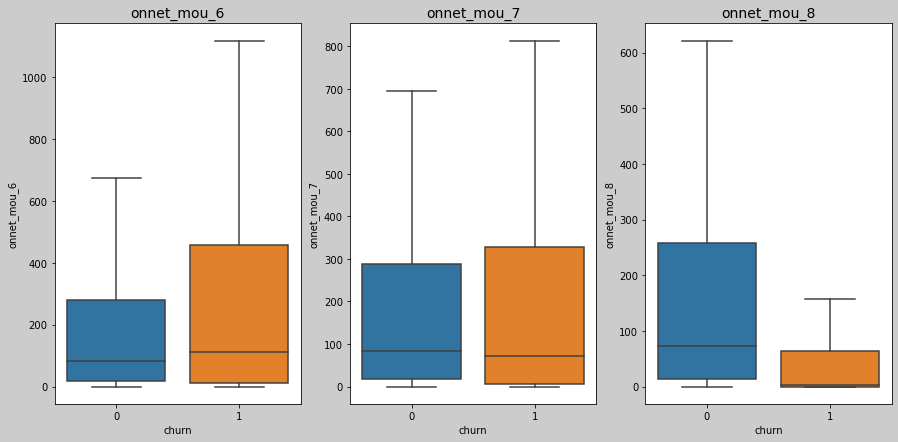

In [45]:
## Onnet

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.onnet_mou_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('onnet_mou_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.onnet_mou_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('onnet_mou_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.onnet_mou_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('onnet_mou_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe the decreasing trend in this case and the Onnet usage drops by a significant amount in the 8th month for the customers who churned as compared to the 6th and 7th month.

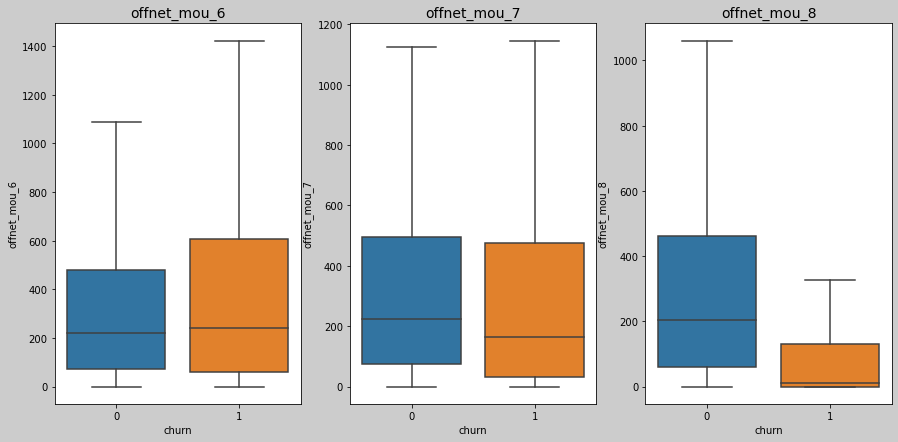

In [46]:
## offnet

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
sns.boxplot(y=telecom_df_high_val_cust.offnet_mou_6,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('offnet_mou_6',fontsize=14,color='k')
# plt.xlabel('Installment',fontsize=14,color = 'k')
# plt.ylabel('Frequency',fontsize=14,color = 'k') 
plt.subplot(1,3,2)
sns.boxplot(y=telecom_df_high_val_cust.offnet_mou_7,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('offnet_mou_7',fontsize=14,color='k')


plt.subplot(1,3,3)
sns.boxplot(y=telecom_df_high_val_cust.offnet_mou_8,x=telecom_df_high_val_cust.churn,showfliers=False)
plt.title('offnet_mou_8',fontsize=14,color='k')


plt.show()

**INFERENCE**- We can observe the decreasing trend in this case and the offnet usage drops by a significant amount in the 8th month for the customers who churned as compared to the 6th and 7th month.

#### Deriving a few more new variables to understand the data

In [47]:
# We have a column called 'aon'
# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
telecom_df_high_val_cust['tenure'] = (telecom_df_high_val_cust['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_df_high_val_cust.drop('aon',axis=1, inplace=True)

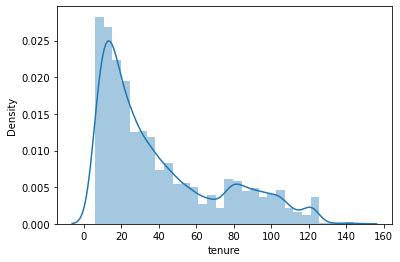

In [48]:
# Checking the distribution of the tenure variable

sns.distplot(telecom_df_high_val_cust['tenure'],bins=30)
plt.show()

In [49]:
# defining the tenure range and labels
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_df_high_val_cust['tenure_range'] = pd.cut(telecom_df_high_val_cust['tenure'], tn_range, labels=tn_label)
telecom_df_high_val_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

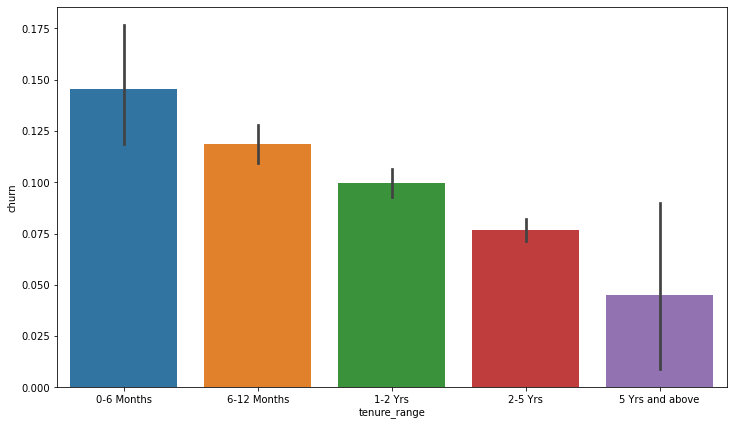

In [50]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_df_high_val_cust)
plt.show()

**INFERENCE**- It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

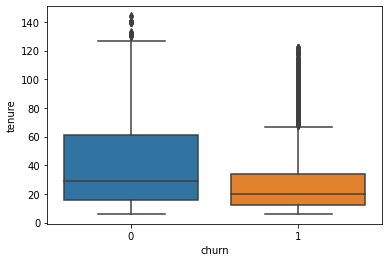

In [51]:
sns.boxplot(x = telecom_df_high_val_cust.churn, y = telecom_df_high_val_cust.tenure)

plt.show()

**INFERENCE**- From the above plot , its clear that long term tenured customers do no churn and they keep availing telecom services

In [52]:
telecom_df_high_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

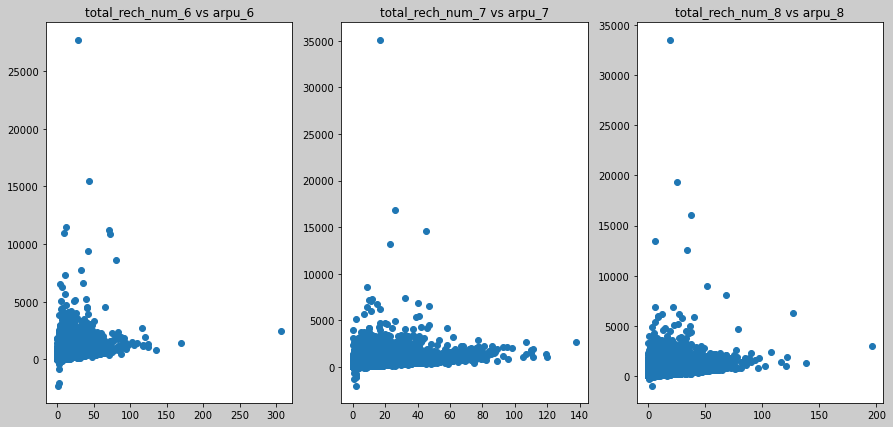

In [53]:
# lets now draw a scatter plot between total recharge and avg revenue for the 6th,7th & 8th month

plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,3,1)
plt.scatter(x = 'total_rech_num_6', y='arpu_6',data=telecom_df_high_val_cust)
plt.title('total_rech_num_6 vs arpu_6')

plt.subplot(1,3,2)
plt.scatter(x = 'total_rech_num_7', y='arpu_7',data=telecom_df_high_val_cust)
plt.title('total_rech_num_7 vs arpu_7')

plt.subplot(1,3,3)
plt.scatter(x = 'total_rech_num_8', y='arpu_8',data=telecom_df_high_val_cust)
plt.title('total_rech_num_8 vs arpu_8')

plt.show()

In [54]:
# Creating categories for month 8 column totalrecharge and their count
telecom_df_high_val_cust['total_rech_data_group_8']=pd.cut(telecom_df_high_val_cust['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_df_high_val_cust['total_rech_num_group_8']=pd.cut(telecom_df_high_val_cust['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])


					Distribution of total_rech_data_8 variable
 <=10_Recharges     15289
No_Recharge        14018
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


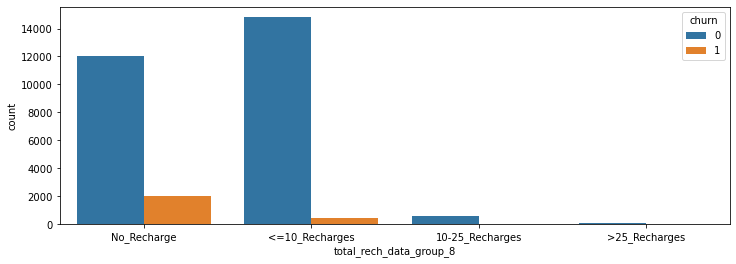

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19315
10-25_Recharges     8235
>25_Recharges       1821
No_Recharge          582
Name: total_rech_num_group_8, dtype: int64


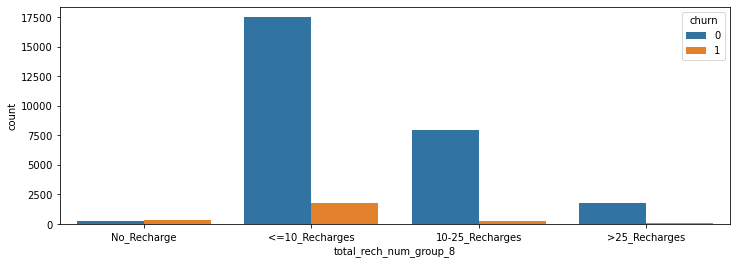

In [55]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df_high_val_cust,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_df_high_val_cust['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df_high_val_cust,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_df_high_val_cust['total_rech_num_group_8'].value_counts())
plt.show()

**INFERENCE**-As the number of recharge rate increases, the churn rate decreases clearly.

#### DROPPPING IRRELEVANT COLUMNS

In [56]:
# lets check the correlation amongst the independent variables,and drop the highly correlated ones
telecom_df_high_val_cust_corr = telecom_df_high_val_cust.corr()
telecom_df_high_val_cust_corr.loc[:,:] = np.tril(telecom_df_high_val_cust_corr, k=-1)
telecom_df_high_val_cust_corr = telecom_df_high_val_cust_corr.stack()
telecom_df_high_val_cust_corr
telecom_df_high_val_cust_corr[(telecom_df_high_val_cust_corr > 0.80) | (telecom_df_high_val_cust_corr < -0.80)].sort_values(ascending=False)


total_rech_amt_8  arpu_8               0.955322
total_rech_amt_6  arpu_6               0.946104
total_rech_amt_7  arpu_7               0.943571
isd_og_mou_8      isd_og_mou_7         0.943120
                  isd_og_mou_6         0.918187
isd_og_mou_7      isd_og_mou_6         0.915247
sachet_2g_7       total_rech_data_7    0.904233
sachet_2g_6       total_rech_data_6    0.903868
sachet_2g_8       total_rech_data_8    0.900628
total_ic_mou_6    loc_ic_mou_6         0.896444
total_ic_mou_8    loc_ic_mou_8         0.896204
total_ic_mou_7    loc_ic_mou_7         0.884392
std_og_t2t_mou_8  onnet_mou_8          0.860648
std_og_t2t_mou_7  onnet_mou_7          0.860314
std_og_t2t_mou_6  onnet_mou_6          0.859328
std_og_t2m_mou_7  offnet_mou_7         0.854589
total_og_mou_8    std_og_mou_8         0.851202
std_og_t2m_mou_8  offnet_mou_8         0.850904
total_og_mou_7    std_og_mou_7         0.849683
loc_ic_mou_8      loc_ic_t2m_mou_8     0.848803
std_ic_mou_8      std_ic_t2m_mou_8     0

In [57]:
# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

col_to_drop=['arpu_8','arpu_6','arpu_7','isd_og_mou_7','isd_og_mou_6',
            'sachet_2g_7','sachet_2g_6','sachet_2g_8','loc_ic_mou_6','loc_ic_mou_8',
            'loc_ic_mou_7','onnet_mou_8','onnet_mou_7','onnet_mou_6','offnet_mou_7','std_og_mou_8','offnet_mou_8']



In [58]:
#  dropping these columns
telecom_df_high_val_cust.drop(col_to_drop, axis=1, inplace=True)

In [59]:
telecom_df_high_val_cust.head()

mobile_number  offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      7000842753          0.00           0.00           0.00           0.00   
7      7000701601        453.43          16.23          33.49          31.64   
8      7001524846         94.66           0.00           0.00           0.00   
21     7002124215        757.93           0.00           0.00           0.00   
23     7000887461         85.41           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36            808.74            876.99   
23              0.00              2.36              6.35             39.61   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0               0.00              0.00              0.00          0.00   
7               6.66             20.08             16.68         60.86   
8               0.00              0.00              0.00        130.26   
21              0.00              0.00              0.00        763.29   
23              0.00              0.00              0.00          2.36   

    std_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.00          0.00           0.0           0.0          0.00   
7          75.14         10.01           4.5           0.0          6.50   
8         143.48          0.00           0.0           0.0         10.23   
21        934.69          0.00           0.0           0.0          0.00   
23        

Dropping columns which were used to derive new features

In [60]:
telecom_df_high_val_cust.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'], axis=1, inplace=True)

#### HEATMAP

In [61]:
#checking correlations
telecom_df_high_val_cust.corr()

mobile_number  offnet_mou_6  roam_ic_mou_6  \
mobile_number                        1.000000      0.022643       0.010750   
offnet_mou_6                         0.022643      1.000000       0.048404   
roam_ic_mou_6                        0.010750      0.048404       1.000000   
roam_ic_mou_7                       -0.002397      0.041627       0.510030   
roam_ic_mou_8                        0.005041      0.057471       0.372030   
roam_og_mou_6                        0.005777      0.119900       0.645768   
roam_og_mou_7                       -0.001375      0.101500       0.368744   
roam_og_mou_8                       -0.002988      0.103825       0.241524   
loc_og_t2t_mou_6                     0.047800      0.081755      -0.016559   
loc_og_t2t_mou_7                     0.045449      0.065071       0.009213   
loc_og_t2t_mou_8                     0.044625      0.072560       0.022280   
loc_og_t2m_mou_6                     0.079822      0.487123      -0.048768   
loc_og_t2m_mou_7                     0.077058      0.372431      -0.002429   
loc_og_t2m_mou_8                     0.080623      0.314527       0.015628   
loc_og_t2f_mou_6                     0.051734      0.102317      -0.012979   
loc_og_t2f_mou_7                     0.052730      0.077050      -0.005168   
loc_og_t2f_mou_8                     0.056273      0.068142      -0.000962   
loc_og_t2c_mou_6                    -0.011930      0.059596      -0.008838   
loc_og_t2c_mou_7                    -0.014405      0.030624       0.001532   
loc_og_t2c_mou_8                    -0.006177      0.026463       0.008465   
loc_og_mou_6                         0.084701      0.377424      -0.043011   
loc_og_mou_7                         0.081790      0.285837       0.004038   
loc_og_mou_8                         0.082789      0.251300       0.023941   
std_og_t2t_mou_6                    -0.016292      0.053496      -0.032865   
std_og_t2t_mou_7                    -0.019482      0.022243       0.006984   
std_og_t2t_mou_8                    -0.015177      0.027611       0.022473   
std_og_t2m_mou_6                    -0.024903      0.830341      -0.024659   
std_og_t2m_mou_7                    -0.028205      0.608533       0.022447   
std_og_t2m_mou_8                    -0.024585      0.468227       0.034299   
std_og_t2f_mou_6                     0.026126      0.060610       0.001519   
std_og_t2f_mou_7                     0.018299      0.048345       0.017684   
std_og_t2f_mou_8                     0.022086      0.040233       0.014405   
std_og_mou_6                        -0.027031      0.594679      -0.038347   
std_og_mou_7                        -0.031570      0.428024       0.020170   
isd_og_mou_8                        -0.003758      0.073112      -0.004357   
spl_og_mou_6                        -0.018374      0.128190      -0.032804   
spl_og_mou_7                        -0.020769      0.078360      -0.014105   
spl_og_mou_8                        -0.012999      0.066733      -0.009096   
og_others_6                         -0.006557      0.057408      -0.019157   
og_others_7                         -0.000907      0.017418       0.000102   
og_others_8                          0.000608      0.015634       0.000271   
total_og_mou_6                       0.021853      0.739447      -0.058550   
total_og_mou_7                       0.013831      0.538525       0.019353   
total_og_mou_8                       0.019720      0.426765       0.044896   
loc_ic_t2t_mou_6                     0.033193      0.033274      -0.018624   
loc_ic_t2t_mou_7                     0.030424      0.020534       0.009083   
loc_ic_t2t_mou_8                     0.033686      0.017776       0.020313   
loc_ic_t2m_mou_6                     0.063875      0.201540      -0.040470   
loc_ic_t2m_mou_7                     0.058778      0.160525       0.004627   
loc_ic_t2m_mou_8                     0.061402      0.123816       0.017632   
loc_ic_t2f_mou_6                     0.054962      0.0

<AxesSubplot:>

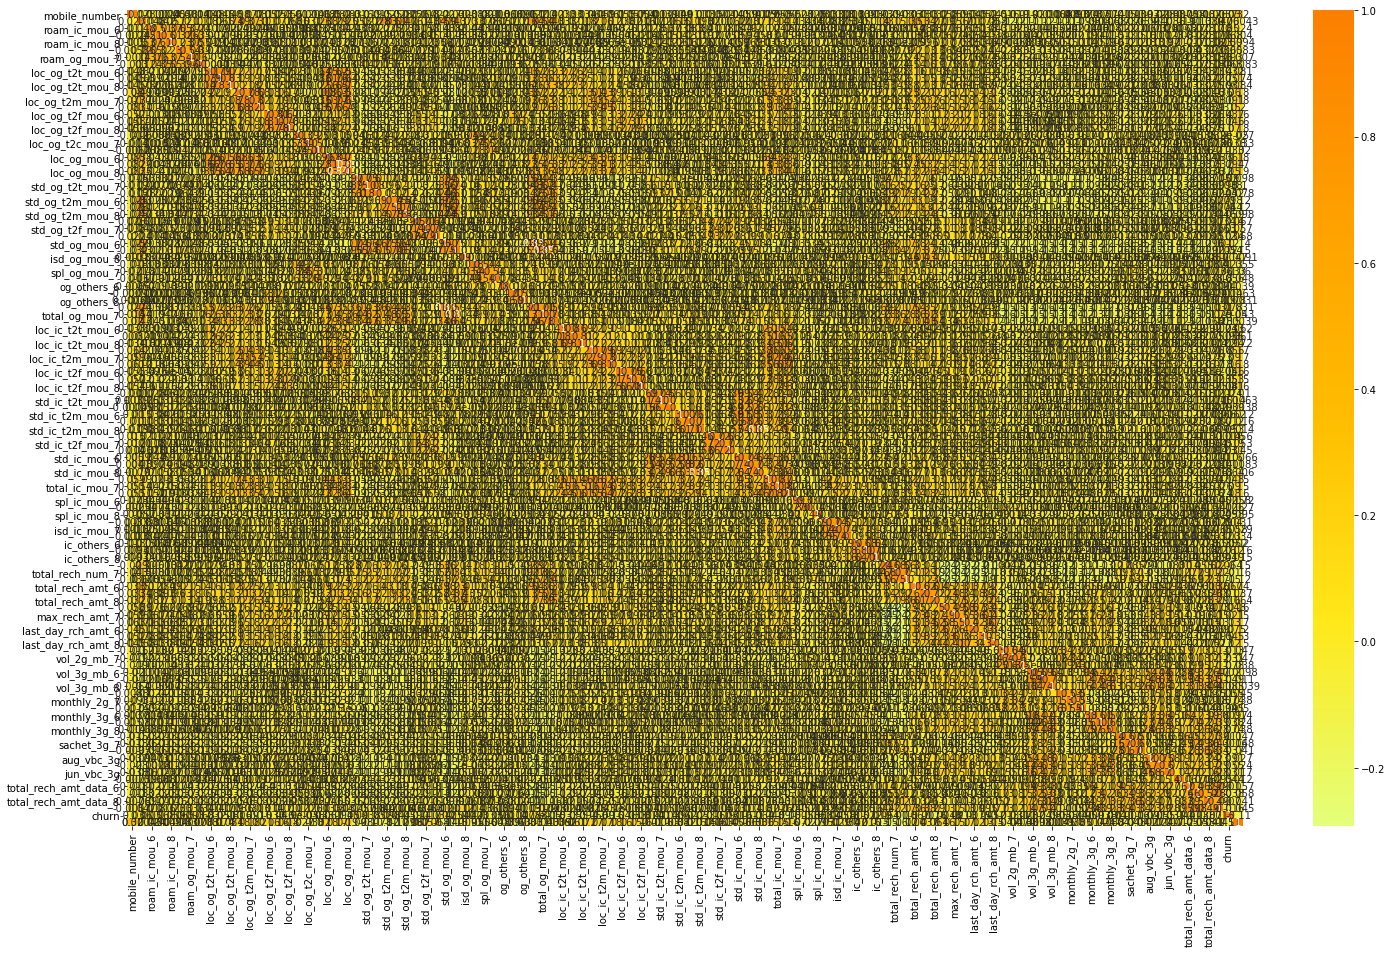

In [62]:
# plotting the correlation heatmap
plt.figure(figsize=(25,15))

sns.heatmap(telecom_df_high_val_cust.corr(),annot=True,cmap='Wistia')

#### DUMMY VARIABLES

In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_df_high_val_cust[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

total_rech_data_group_8_<=10_Recharges  \
0                                        1   
7                                        0   
8                                        1   
21                                       0   
23                                       1   

    total_rech_data_group_8_10-25_Recharges  \
0                                         0   
7                                         0   
8                                         0   
21                                        0   
23                                        0   

    total_rech_data_group_8_>25_Recharges  \
0                                       0   
7                                       0   
8                                       0   
21                                      0   
23                                      0   

    total_rech_num_group_8_<=10_Recharges  \
0                                       1   
7                                       1   
8                                       0   
21                                      0   
23                                      1   

    total_rech_num_group_8_10-25_Recharges  \
0                                        0   
7                                        0   
8                                        1   
21                                       0   
23                                       0   

    total_rech_num_group_8_>25_Recharges  tenure_range_6-12 Months  \
0                                      0                         0   
7                                      0                         0   
8                                      0                         1   
21                                     1                         0   
23                                     0                         0   

    tenure_range_1-2 Yrs  tenure_range_2-5 Yrs  tenure_range_5 Yrs and above  
0                      0                     1                             0  
7                      0                     1                             0  
8                      0                     0                             0  
21                     1                     0                             0  
23                     1                     0                             0

In [64]:
# Adding the results to the master dataframe
telecom_df_high_val_cust = pd.concat([telecom_df_high_val_cust, dummy], axis=1)

In [65]:
#Converting the datatypes for the converted categorical columns to int.
telecom_df_high_val_cust['total_rech_data_group_8_<=10_Recharges'] = telecom_df_high_val_cust['total_rech_data_group_8_<=10_Recharges'].astype(int)
telecom_df_high_val_cust['total_rech_data_group_8_10-25_Recharges'] = telecom_df_high_val_cust['total_rech_data_group_8_10-25_Recharges'].astype(int)
telecom_df_high_val_cust['total_rech_data_group_8_>25_Recharges'] = telecom_df_high_val_cust['total_rech_data_group_8_>25_Recharges'].astype(int)
telecom_df_high_val_cust['total_rech_num_group_8_<=10_Recharges'] = telecom_df_high_val_cust['total_rech_num_group_8_<=10_Recharges'].astype(int)
telecom_df_high_val_cust['total_rech_num_group_8_10-25_Recharges'] = telecom_df_high_val_cust['total_rech_num_group_8_10-25_Recharges'].astype(int)
telecom_df_high_val_cust['total_rech_num_group_8_>25_Recharges'] = telecom_df_high_val_cust['total_rech_num_group_8_>25_Recharges'].astype(int)
telecom_df_high_val_cust['tenure_range_6-12 Months'] = telecom_df_high_val_cust['tenure_range_6-12 Months'].astype(int)
telecom_df_high_val_cust['tenure_range_1-2 Yrs'] = telecom_df_high_val_cust['tenure_range_1-2 Yrs'].astype(int)
telecom_df_high_val_cust['tenure_range_2-5 Yrs'] = telecom_df_high_val_cust['tenure_range_2-5 Yrs'].astype(int)
telecom_df_high_val_cust['tenure_range_5 Yrs and above'] = telecom_df_high_val_cust['tenure_range_5 Yrs and above'].astype(int)                                            
                         

In [66]:
# Creating a copy of the filtered dataframe

df=telecom_df_high_val_cust[:].copy()

In [67]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 127 columns):
 #    Column                                   Dtype   
---   ------                                   -----   
 0    mobile_number                            int64   
 1    offnet_mou_6                             float64 
 2    roam_ic_mou_6                            float64 
 3    roam_ic_mou_7                            float64 
 4    roam_ic_mou_8                            float64 
 5    roam_og_mou_6                            float64 
 6    roam_og_mou_7                            float64 
 7    roam_og_mou_8                            float64 
 8    loc_og_t2t_mou_6                         float64 
 9    loc_og_t2t_mou_7                         float64 
 10   loc_og_t2t_mou_8                         float64 
 11   loc_og_t2m_mou_6                         float64 
 12   loc_og_t2m_mou_7                         float64 
 13   loc_og_t2m_mou_8                         flo

In [68]:
# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8'], axis=1, inplace=True)

In [69]:
telecom_df_high_val_cust.shape

(29953, 127)

### MODELLING

In [70]:
# Cheking the dataset
df.head()

offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0           0.00           0.00           0.00           0.00           0.00   
7         453.43          16.23          33.49          31.64          23.74   
8          94.66           0.00           0.00           0.00           0.00   
21        757.93           0.00           0.00           0.00           0.00   
23         85.41           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.00           0.00              0.00              0.00   
7           12.59          38.06             51.39             31.38   
8            0.00           0.00            297.13            217.59   
21           0.00           0.00              4.48              6.16   
23           0.00           0.00             48.96             50.66   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            308.63            447.38            162.28   
8              12.49             80.96             70.58             50.54   
21             23.34             91.81             87.93            104.81   
23             33.58             82.94             83.01            148.56   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0               0.00              0.00              0.00               0.0   
7              62.13             55.14             53.23               0.0   
8               0.00              0.00              0.00               0.0   
21              0.75              0.00              1.58               0.0   
23              0.00              0.00              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0                0.0              0.00          0.00          0.00   
7                0.0              0.00        422.16        533.91   
8                0.0              7.15        378.09        288.18   
21               0.0              0.00         97.04         94.09   
23               0.0             17.71        131.91        133.68   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79              4.30             23.29             12.01   
8          63.04            116.56            133.43             22.58   
21        129.74             97.93            125.94             61.79   
23        182.14              0.00              0.00              0.00   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0               0.00              0.00              0.00              0.00   
7              49.89             31.76             49.14              6.66   
8              13.69             10.04             75.69              0.00   
21            665.36            808.74            876.99              0.00   
23              2.36              6.35             39.61              0.00   

    std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.00              0.00          0.00          0.00   
7              20.08             16.68         60.86         75.14   
8               0.00              0.00        130.26        143.48   
21              0.00              0.00        763.29        934.69   
23              0.00              0.00          2.36          6.35   

    isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0           0.00           0.0           0.0          0.00          0.0   
7          10.01           4.5           0.0          6.50          0.0   
8           0.00           0.0           0.0         10.23          0.0   
21          0.00           0.0           0.0          0.00          0.0   
23          0.00     

In [71]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [72]:
X.head()

offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0           0.00           0.00           0.00           0.00           0.00   
7         453.43          16.23          33.49          31.64          23.74   
8          94.66           0.00           0.00           0.00           0.00   
21        757.93           0.00           0.00           0.00           0.00   
23         85.41           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.00           0.00              0.00              0.00   
7           12.59          38.06             51.39             31.38   
8            0.00           0.00            297.13            217.59   
21           0.00           0.00              4.48              6.16   
23           0.00           0.00             48.96             50.66   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            308.63            447.38            162.28   
8              12.49             80.96             70.58             50.54   
21             23.34             91.81             87.93            104.81   
23             33.58             82.94             83.01            148.56   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0               0.00              0.00              0.00               0.0   
7              62.13             55.14             53.23               0.0   
8               0.00              0.00              0.00               0.0   
21              0.75              0.00              1.58               0.0   
23              0.00              0.00              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0                0.0              0.00          0.00          0.00   
7                0.0              0.00        422.16        533.91   
8                0.0              7.15        378.09        288.18   
21               0.0              0.00         97.04         94.09   
23               0.0             17.71        131.91        133.68   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79              4.30             23.29             12.01   
8          63.04            116.56            133.43             22.58   
21        129.74             97.93            125.94             61.79   
23        182.14              0.00              0.00              0.00   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0               0.00              0.00              0.00              0.00   
7              49.89             31.76             49.14              6.66   
8              13.69             10.04             75.69              0.00   
21            665.36            808.74            876.99              0.00   
23              2.36              6.35             39.61              0.00   

    std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.00              0.00          0.00          0.00   
7              20.08             16.68         60.86         75.14   
8               0.00              0.00        130.26        143.48   
21              0.00              0.00        763.29        934.69   
23              0.00              0.00          2.36          6.35   

    isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0           0.00           0.0           0.0          0.00          0.0   
7          10.01           4.5           0.0          6.50          0.0   
8           0.00           0.0           0.0         10.23          0.0   
21          0.00           0.0           0.0          0.00          0.0   
23          0.00     

In [73]:
# lets create y dataset for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [74]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20967, 122)
Dimension of X_test: (8986, 122)


In [75]:
#checking X_train info
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20967 entries, 59193 to 99254
Data columns (total 122 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    offnet_mou_6                             float64
 1    roam_ic_mou_6                            float64
 2    roam_ic_mou_7                            float64
 3    roam_ic_mou_8                            float64
 4    roam_og_mou_6                            float64
 5    roam_og_mou_7                            float64
 6    roam_og_mou_8                            float64
 7    loc_og_t2t_mou_6                         float64
 8    loc_og_t2t_mou_7                         float64
 9    loc_og_t2t_mou_8                         float64
 10   loc_og_t2m_mou_6                         float64
 11   loc_og_t2m_mou_7                         float64
 12   loc_og_t2m_mou_8                         float64
 13   loc_og_t2f_mou_6                         float64
 14   

In [76]:
#extracting the numerical columns
numeric_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

numeric_col

['offnet_mou_6',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic

#### SCALING

In [77]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])

In [78]:
X_train.head()

offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
59193      0.080447       0.000000            0.0            0.0   
41301      0.000326       0.000000            0.0            0.0   
77012      0.017060       0.009602            0.0            0.0   
16823      0.021631       0.000000            0.0            0.0   
69457      0.007216       0.000000            0.0            0.0   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
59193       0.000000            0.0            0.0          0.000000   
41301       0.000000            0.0            0.0          0.000141   
77012       0.004935            0.0            0.0          0.004309   
16823       0.000000            0.0            0.0          0.019383   
69457       0.000000            0.0            0.0          0.005918   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
59193          0.000000          0.000000          0.000706          0.014467   
41301          0.000000          0.000000          0.000531          0.000836   
77012          0.006591          0.007169          0.004605          0.010169   
16823          0.007712          0.006823          0.033080          0.018779   
69457          0.000000          0.000000          0.011320          0.000233   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
59193          0.005630          0.000177          0.000443          0.000000   
41301          0.000939          0.000000          0.000000          0.000000   
77012          0.012493          0.002019          0.001680          0.001037   
16823          0.029111          0.001999          0.005801          0.005592   
69457          0.000000          0.000000          0.000000          0.000000   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
59193          0.026452          0.002773          0.009362      0.000339   
41301          0.004347          0.007565          0.004450      0.000322   
77012          0.000000          0.000000          0.046315      0.004929   
16823          0.000000          0.000000          0.032338      0.026689   
69457          0.000663          0.008776          0.000000      0.008607   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
59193      0.008881      0.002530          0.000000          0.012728   
41301      0.000509      0.000422          0.000273          0.000000   
77012      0.012773      0.012653          0.016553          0.013999   
16823      0.019749      0.020026          0.000548          0.000511   
69457      0.000142      0.000000          0.105265          0.008914   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
59193          0.014862          0.080202          0.079134          0.031228   
41301          0.000000          0.000000          0.000000          0.000359   
77012          0.008158          0.012401          0.021264          0.005293   
16823          0.000000          0.002585          0.000979          0.000297   
69457          0.001027          0.000795          0.000000          0.000000   

       std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
59193               0.0               0.0           0.00000      0.079078   
41301               0.0               0.0           0.00000      0.000238   
77012               0.0               0.0           0.00000      0.026688   
16823               0.0               0.0           0.00917      0.003029   
69457               0.0               0.0           0.00000      0.092738   

       std_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
59193      0.076473      0.000000      0.015877      0.001502      0.005172   
41301      0.000000      0.000000      0.009463      0.003830      0.002458   
77012      0.028271      0.000000      0.000000      0.000000      0.066486   
16823      0.001205    

### Data Imbalance Handling

Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [80]:
#installing library for implementing SMOTE

In [81]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [83]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)


Dimension of X_train_sm Shape: (38528, 122)
Dimension of y_train_sm Shape: (38528,)


### Logistic Regression

In [84]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [85]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38406
Model Family:                Binomial   Df Model:                          121
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13989.
Date:                Tue, 23 Nov 2021   Deviance:                       27978.
Time:                        23:31:42   Pearson chi2:                 2.45e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       2.6237      0.132     19.870      0.000       2.365       2.883
offnet_mou_6                                6.5308      3.782      1.727      0.084      -0.881      13.943
roam_ic_mou_6                               2.0206      0.918      2.202      0.028       0.222       3.819
roam_ic_mou_7                               5.2660      1.362      3.867      0.000       2.597       7.935
roam_ic_mou_8                              -4.0554      0.830     -4.888      0.000      -5.681      -2.429
roam_og_mou_6                              -3.5285      1.292     -2.731      0.006      -6.061      -0.996
roam_og_mou_7                               1.0188      0.821      1.241      0.215      -0.590       2.628
roam_og_mou_8                               5.8187      1.201      4.846      0.000       3.465       8.172
loc_og_t2t_mou_6                         4.555e+04      2e+04      2.281      0.023    6419.052    8.47e+04
loc_og_t2t_mou_7                         3.096e+04   2.17e+04      1.424      0.154   -1.16e+04    7.36e+04
loc_og_t2t_mou_8                         2.818e+05   3.48e+04      8.106      0.000    2.14e+05     3.5e+05
loc_og_t2m_mou_6                         3.349e+04   1.47e+04      2.281      0.023    4713.977    6.23e+04
loc_og_t2m_mou_7                         1.969e+04   1.38e+04      1.424      0.154   -7412.840    4.68e+04
loc_og_t2m_mou_8                           1.3e+05    1.6e+04      8.107      0.000    9.86e+04    1.61e+05
loc_og_t2f_mou_6                         1.039e+04   4551.865      2.282      0.023    1463.922    1.93e+04
loc_og_t2f_mou_7                         5160.9190   3630.896      1.421      0.155   -1955.507    1.23e+04
loc_og_t2f_mou_8                         1.542e+04   1902.142      8.109      0.000    1.17e+04    1.92e+04
loc_og_t2c_mou_6                           -6.0154      1.031     -5.837      0.000      -8.035      -3.995
loc_og_t2c_mou_7                            7.0074      1.535      4.564      0.000       3.998      10.016
loc_og_t2c_mou_8                            1.4575      1.241      1.175      0.240      -0.974       3.889
loc_og_mou_6                            -7.533e+04    3.3e+04     -2.280      0.023    -1.4e+05   -1.06e+04
loc_og_mou_7                            -3.236e+04   2.27e+04     -1.425      0.154   -7.69e+04    1.21e+04
loc_og_mou_8                            -1.354e+05   4.48e+04     -3.021      0.003   -2.23e+05   -4.76e+04
std_og_t2t_mou_6                         7861.1411   2.82e+04      0.278      0.781   -4.75e+04    6.32e+04
std_og_t2t_mou_7                         1.457e+04   3.14e+04      0.463      0.643    -4.7e+04    7.62e+04
std_og_t2t_mou_8                         1.117e+05   2.01e+

### Logistic Regression using Feature Selection (RFE )

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 25 variables
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=25)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [87]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [88]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aug_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_8'],
      dtype='object')


In [89]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('offnet_mou_6', False, 87),
 ('roam_ic_mou_6', False, 30),
 ('roam_ic_mou_7', False, 12),
 ('roam_ic_mou_8', False, 85),
 ('roam_og_mou_6', False, 72),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 10),
 ('loc_og_t2t_mou_6', False, 75),
 ('loc_og_t2t_mou_7', False, 83),
 ('loc_og_t2t_mou_8', False, 6),
 ('loc_og_t2m_mou_6', False, 46),
 ('loc_og_t2m_mou_7', False, 74),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 76),
 ('loc_og_t2f_mou_7', False, 70),
 ('loc_og_t2f_mou_8', False, 11),
 ('loc_og_t2c_mou_6', False, 28),
 ('loc_og_t2c_mou_7', False, 5),
 ('loc_og_t2c_mou_8', False, 60),
 ('loc_og_mou_6', False, 92),
 ('loc_og_mou_7', False, 59),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 15),
 ('std_og_t2t_mou_7', False, 82),
 ('std_og_t2t_mou_8', False, 7),
 ('std_og_t2m_mou_6', False, 88),
 ('std_og_t2m_mou_7', False, 16),
 ('std_og_t2m_mou_8', False, 8),
 ('std_og_t2f_mou_6', False, 39),
 ('std_og_t2f_mou_7', False, 54),
 ('std_og_t2f_mou_8', Tr

### Assessing the model with StatsModels

In [90]:
X_train_sm = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38502
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15270.
Date:                Tue, 23 Nov 2021   Deviance:                       30539.
Time:                        23:32:15   Pearson chi2:                 5.24e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1538      0.033     35.380      0.000       1.090       1.218
roam_og_mou_7             5.1649      0.444     11.633      0.000       4.295       6.035
loc_og_t2m_mou_8         -1.8915      1.541     -1.228      0.220      -4.912       1.129
loc_og_mou_8            -12.3647      2.380     -5.196      0.000     -17.029      -7.700
std_og_t2f_mou_8         -8.8463      1.824     -4.850      0.000     -12.421      -5.271
total_og_mou_7            5.8749      0.473     12.419      0.000       4.948       6.802
total_og_mou_8          -17.8207      0.803    -22.202      0.000     -19.394     -16.247
loc_ic_t2t_mou_8        -10.9528      1.922     -5.698      0.000     -14.720      -7.186
loc_ic_t2m_mou_8        -18.0050      1.342    -13.414      0.000     -20.636     -15.374
loc_ic_t2f_mou_8        -21.3425      2.223     -9.603      0.000     -25.699     -16.986
total_ic_mou_7           14.6317      0.841     17.402      0.000      12.984      16.280
total_ic_mou_8          -22.3992      1.508    -14.858      0.000     -25.354     -19.444
spl_ic_mou_8            -17.1708      1.396    -12.301      0.000     -19.907     -14.435
total_rech_num_6          2.8725      0.692      4.151      0.000       1.516       4.229
total_rech_num_8         -7.7663      0.594    -13.065      0.000      -8.931      -6.601
total_rech_amt_6         17.8812      1.483     12.054      0.000      14.974      20.789
total_rech_amt_7         10.1300      1.749      5.792      0.000       6.702      13.558
last_day_rch_amt_8      -13.1006      0.650    -20.141      0.000     -14.375     -11.826
vol_2g_mb_8             -13.7676      1.174    -11.725      0.000     -16.069     -11.466
vol_3g_mb_8              -3.5486      1.431     -2.479      0.013      -6.354      -0.743
monthly_2g_8             -5.4230      0.362    -14.976      0.000      -6.133      -4.713
monthly_3g_8             -2.8005      0.562     -4.981      0.000      -3.903      -1.699
sachet_3g_8              -1.2206      1.390     -0.878      0.380      -3.945       1.504
aug_vbc_3g               -5.6170      1.063     -5.286      0.000      -7.700      -3.534
sep_vbc_3g              -79.6193      7.311    -10.891      0.000     -93.948     -65.291
total_rech_amt_data_8   -55.2470      4.290    -12.878      0.000     -63.656     -46.838
=========================================================================================
"""

In [91]:
# From the p-value of the individual columns 
# we can drop the column 'sachet_3g_8' as it has high p-value of 0.380
rfe_columns_1=rfe_columns.drop('sachet_3g_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aug_vbc_3g', 'sep_vbc_3g', 'total_rech_amt_data_8'],
      dtype='object')


In [92]:
# Training the model with the edited feature list
X_train_sm = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38503
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15270.
Date:                Tue, 23 Nov 2021   Deviance:                       30540.
Time:                        23:32:15   Pearson chi2:                 5.21e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1527      0.033     35.378      0.000       1.089       1.217
roam_og_mou_7             5.1686      0.444     11.640      0.000       4.298       6.039
loc_og_t2m_mou_8         -1.8878      1.540     -1.226      0.220      -4.907       1.131
loc_og_mou_8            -12.3626      2.379     -5.197      0.000     -17.025      -7.701
std_og_t2f_mou_8         -8.8387      1.824     -4.846      0.000     -12.413      -5.264
total_og_mou_7            5.8852      0.473     12.446      0.000       4.958       6.812
total_og_mou_8          -17.8215      0.803    -22.202      0.000     -19.395     -16.248
loc_ic_t2t_mou_8        -10.9473      1.922     -5.695      0.000     -14.715      -7.180
loc_ic_t2m_mou_8        -18.0056      1.342    -13.413      0.000     -20.637     -15.374
loc_ic_t2f_mou_8        -21.3579      2.223     -9.607      0.000     -25.715     -17.001
total_ic_mou_7           14.6368      0.841     17.404      0.000      12.988      16.285
total_ic_mou_8          -22.4119      1.508    -14.865      0.000     -25.367     -19.457
spl_ic_mou_8            -17.1708      1.396    -12.302      0.000     -19.906     -14.435
total_rech_num_6          2.8708      0.692      4.149      0.000       1.515       4.227
total_rech_num_8         -7.7737      0.594    -13.080      0.000      -8.938      -6.609
total_rech_amt_6         17.9035      1.483     12.070      0.000      14.996      20.811
total_rech_amt_7         10.1017      1.748      5.779      0.000       6.676      13.528
last_day_rch_amt_8      -13.1076      0.651    -20.148      0.000     -14.383     -11.832
vol_2g_mb_8             -13.7615      1.174    -11.721      0.000     -16.063     -11.460
vol_3g_mb_8              -3.7676      1.409     -2.674      0.008      -6.530      -1.006
monthly_2g_8             -5.3832      0.359    -14.978      0.000      -6.088      -4.679
monthly_3g_8             -2.6776      0.545     -4.914      0.000      -3.746      -1.610
aug_vbc_3g               -5.5998      1.063     -5.266      0.000      -7.684      -3.516
sep_vbc_3g              -79.6861      7.312    -10.898      0.000     -94.017     -65.355
total_rech_amt_data_8   -56.5781      4.033    -14.030      0.000     -64.482     -48.674
=========================================================================================
"""

In [93]:
# From the p-value of the individual columns, 
# we can drop the column 'loc_og_t2m_mou_8' as it has high p-value of 0.220
rfe_columns_2=rfe_columns_1.drop('loc_og_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_8'],
      dtype='object')


In [94]:
# Training the model with the edited feature list
X_train_sm = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38504
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15271.
Date:                Tue, 23 Nov 2021   Deviance:                       30542.
Time:                        23:32:15   Pearson chi2:                 4.81e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1523      0.033     35.379      0.000       1.088       1.216
roam_og_mou_7             5.1741      0.444     11.653      0.000       4.304       6.044
loc_og_mou_8            -14.7311      1.464    -10.061      0.000     -17.601     -11.861
std_og_t2f_mou_8         -8.8690      1.824     -4.863      0.000     -12.444      -5.294
total_og_mou_7            5.9073      0.473     12.497      0.000       4.981       6.834
total_og_mou_8          -17.8414      0.803    -22.223      0.000     -19.415     -16.268
loc_ic_t2t_mou_8        -10.4030      1.864     -5.581      0.000     -14.056      -6.750
loc_ic_t2m_mou_8        -18.4046      1.303    -14.124      0.000     -20.959     -15.851
loc_ic_t2f_mou_8        -21.2987      2.224     -9.578      0.000     -25.657     -16.940
total_ic_mou_7           14.6258      0.841     17.392      0.000      12.978      16.274
total_ic_mou_8          -22.4032      1.508    -14.860      0.000     -25.358     -19.448
spl_ic_mou_8            -17.1787      1.396    -12.308      0.000     -19.914     -14.443
total_rech_num_6          2.9002      0.692      4.192      0.000       1.544       4.256
total_rech_num_8         -7.7911      0.594    -13.114      0.000      -8.956      -6.627
total_rech_amt_6         17.8354      1.482     12.033      0.000      14.930      20.740
total_rech_amt_7         10.0840      1.745      5.777      0.000       6.663      13.505
last_day_rch_amt_8      -13.1135      0.650    -20.161      0.000     -14.388     -11.839
vol_2g_mb_8             -13.7402      1.174    -11.708      0.000     -16.040     -11.440
vol_3g_mb_8              -3.7625      1.409     -2.670      0.008      -6.524      -1.001
monthly_2g_8             -5.3891      0.359    -14.997      0.000      -6.093      -4.685
monthly_3g_8             -2.6756      0.545     -4.911      0.000      -3.743      -1.608
aug_vbc_3g               -5.5836      1.063     -5.253      0.000      -7.667      -3.500
sep_vbc_3g              -79.6508      7.308    -10.899      0.000     -93.975     -65.327
total_rech_amt_data_8   -56.5446      4.032    -14.023      0.000     -64.448     -48.642
=========================================================================================
"""

Since all the variables seem to be statistically significant as the p-value <0.05,now checking for multicollinearity below through VIF

### VIF

In [95]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_2].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [97]:
vif

Features    VIF
9          total_ic_mou_8  10.64
6        loc_ic_t2m_mou_8   4.95
14       total_rech_amt_7   4.45
4          total_og_mou_8   4.36
3          total_og_mou_7   4.35
13       total_rech_amt_6   4.15
8          total_ic_mou_7   4.08
11       total_rech_num_6   3.91
12       total_rech_num_8   3.77
17            vol_3g_mb_8   2.87
5        loc_ic_t2t_mou_8   2.51
1            loc_og_mou_8   2.34
19           monthly_3g_8   2.03
20             aug_vbc_3g   1.96
22  total_rech_amt_data_8   1.63
15     last_day_rch_amt_8   1.56
18           monthly_2g_8   1.40
16            vol_2g_mb_8   1.33
7        loc_ic_t2f_mou_8   1.29
0           roam_og_mou_7   1.23
21             sep_vbc_3g   1.06
10           spl_ic_mou_8   1.04
2        std_og_t2f_mou_8   1.04

In [98]:
#dropping column 'total_ic_mou_8' as the VIF > 5
rfe_columns_3=rfe_columns_2.drop('total_ic_mou_8',1)

In [99]:
# Training the model with the edited feature list
X_train_sm = sm.add_constant(X_train_sm[rfe_columns_3])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38505
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15431.
Date:                Tue, 23 Nov 2021   Deviance:                       30862.
Time:                        23:32:16   Pearson chi2:                 1.50e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1904      0.032     36.752      0.000       1.127       1.254
roam_og_mou_7             4.8714      0.439     11.100      0.000       4.011       5.732
loc_og_mou_8            -13.4909      1.462     -9.227      0.000     -16.357     -10.625
std_og_t2f_mou_8        -11.7893      1.905     -6.188      0.000     -15.524      -8.055
total_og_mou_7            7.2599      0.472     15.368      0.000       6.334       8.186
total_og_mou_8          -21.0658      0.796    -26.453      0.000     -22.627     -19.505
loc_ic_t2t_mou_8        -21.0555      1.672    -12.596      0.000     -24.332     -17.779
loc_ic_t2m_mou_8        -28.3193      1.067    -26.536      0.000     -30.411     -26.228
loc_ic_t2f_mou_8        -25.6598      2.185    -11.743      0.000     -29.942     -21.377
total_ic_mou_7            5.8521      0.590      9.912      0.000       4.695       7.009
spl_ic_mou_8            -18.1107      1.405    -12.889      0.000     -20.865     -15.357
total_rech_num_6          3.4890      0.696      5.013      0.000       2.125       4.853
total_rech_num_8         -8.5973      0.595    -14.451      0.000      -9.763      -7.431
total_rech_amt_6         17.2257      1.459     11.803      0.000      14.365      20.086
total_rech_amt_7         10.6656      1.741      6.125      0.000       7.253      14.079
last_day_rch_amt_8      -13.3004      0.650    -20.459      0.000     -14.575     -12.026
vol_2g_mb_8             -14.0564      1.168    -12.031      0.000     -16.346     -11.767
vol_3g_mb_8              -3.8412      1.399     -2.747      0.006      -6.582      -1.100
monthly_2g_8             -5.3743      0.357    -15.058      0.000      -6.074      -4.675
monthly_3g_8             -2.9500      0.544     -5.426      0.000      -4.016      -1.885
aug_vbc_3g               -6.4294      1.064     -6.044      0.000      -8.514      -4.344
sep_vbc_3g              -80.4014      7.370    -10.910      0.000     -94.846     -65.957
total_rech_amt_data_8   -56.3524      4.024    -14.004      0.000     -64.239     -48.466
=========================================================================================
"""

Again we can see that the every features are significant checking again for collinearity below.

In [100]:
vif1 = pd.DataFrame()
vif1['Features'] = X_train_sm[rfe_columns_3].columns
vif1['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_3].values, i) for i in range(X_train_sm[rfe_columns_3].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

Features   VIF
13       total_rech_amt_7  4.45
3          total_og_mou_7  4.31
4          total_og_mou_8  4.23
12       total_rech_amt_6  4.15
10       total_rech_num_6  3.89
11       total_rech_num_8  3.76
8          total_ic_mou_7  3.20
16            vol_3g_mb_8  2.87
6        loc_ic_t2m_mou_8  2.52
1            loc_og_mou_8  2.33
18           monthly_3g_8  2.02
19             aug_vbc_3g  1.96
21  total_rech_amt_data_8  1.63
14     last_day_rch_amt_8  1.56
5        loc_ic_t2t_mou_8  1.53
17           monthly_2g_8  1.40
15            vol_2g_mb_8  1.33
0           roam_og_mou_7  1.23
7        loc_ic_t2f_mou_8  1.22
20             sep_vbc_3g  1.06
9            spl_ic_mou_8  1.04
2        std_og_t2f_mou_8  1.04

Now we can see that all the features are significant and we have successfully removed the collinearity issues in the data.

Hence, proceeding further with making predictions on this data set.

In [101]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_sm)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([4.39765469e-01, 3.62900325e-03, 4.73653449e-04, 3.18570996e-02,
       4.25222354e-01, 2.01412643e-01, 8.50219569e-01, 8.95210096e-02,
       8.90432731e-05, 9.31853113e-03])

In [102]:
y_train_sm_pred.shape

(38528,)

Creating a dataframe with the actual churn flag and the predicted probabilities

In [103]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head(10)

Converted  Converted_prob
0          0        0.439765
1          0        0.003629
2          0        0.000474
3          0        0.031857
4          0        0.425222
5          0        0.201413
6          1        0.850220
7          0        0.089521
8          0        0.000089
9          0        0.009319

Creating new column 'churn_pred' with value 1 if Churn_Prob > 0.5 else 0

In [104]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred
0          0        0.439765           0
1          0        0.003629           0
2          0        0.000474           0
3          0        0.031857           0
4          0        0.425222           0

In [105]:
#printing all the metrics together
print_all_metrics(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )


The confusion matrix of the model is:
[[15561  3703]
 [ 2752 16512]]

The overall accuracy of the model is: 0.8324595099667774

Sensitivity =  0.8571428571428571
Specificity =  0.8077761627906976
False Positive Rate =  0.19222383720930233
Precision =  0.8168191936680682
True Negative Prediction Rate =  0.8497242396112051


In [106]:
# calculating and storing these variables for the metrics comparison table
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_LR_default = metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred)

# calculate the sensitivity
sensitivity_LR_default = (TP / float(TP + FN))

# calculate the specificity
specificity_LR_default = (TN / float(TN + FP))


#### ROC CURVE

In [107]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

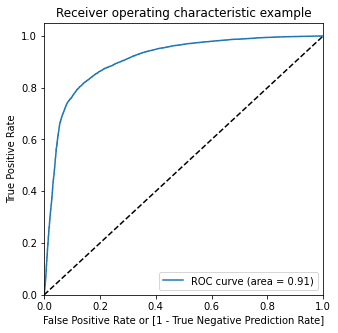

In [108]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

The AUC score for train dataset is 0.91.

#### Finding Optimal Cut-off point

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.439765           0    1    1    1    1    1    0    0   
1          0        0.003629           0    1    0    0    0    0    0    0   
2          0        0.000474           0    1    0    0    0    0    0    0   
3          0        0.031857           0    1    0    0    0    0    0    0   
4          0        0.425222           0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.701204     0.976848     0.425561
0.2          0.2  0.758046     0.957693     0.558399
0.3          0.3  0.794980     0.930596     0.659365
0.4          0.4  0.816445     0.895972     0.736919
0.5          0.5  0.832460     0.857143     0.807776
0.6          0.6  0.837573     0.808970     0.866175
0.7          0.7  0.830565     0.748183     0.912946
0.8          0.8  0.778914     0.606260     0.951568
0.9          0.9  0.606909     0.229392     0.984427


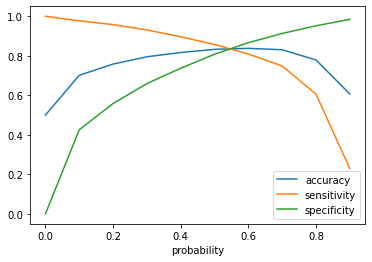

In [111]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**INFERENCE**- It looks like the the cut-off is slightly more than the 0.5

In [112]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.439765           0    1    1    1    1    1    0    0   
1          0        0.003629           0    1    0    0    0    0    0    0   
2          0        0.000474           0    1    0    0    0    0    0    0   
3          0        0.031857           0    1    0    0    0    0    0    0   
4          0        0.425222           0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0    0    0    0     0     0     0     0     0     0     0     0     0  
1    0    0    0     0     0     0     0     0     0     0     0     0  
2    0    0    0     0     0     0     0     0     0     0     0     0  
3    0    0    0     0     0     0     0     0     0     0     0     0  
4    0    0    0     0     0     0     0     0     0     0     0     0

In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.832460     0.857143     0.807776
0.51         0.51  0.834199     0.853353     0.815044
0.52         0.52  0.834847     0.848007     0.821688
0.53         0.53  0.835315     0.843439     0.827191
0.54         0.54  0.835782     0.838611     0.832953
0.55         0.55  0.836093     0.833576     0.838611
0.56         0.56  0.836638     0.829111     0.844165
0.57         0.57  0.837287     0.824336     0.850239
0.58         0.58  0.837936     0.820027     0.855845
0.59         0.59  0.838092     0.814265     0.861919


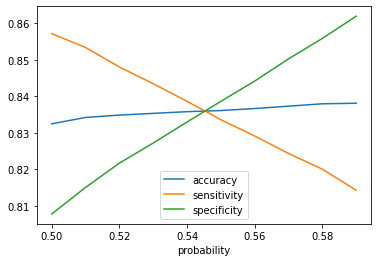

In [114]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**INFERENCE**- We can see that the optimal cutoff is 0.54

In [115]:
#### From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.439765           0    1    1    1    1    1    0    0   
1          0        0.003629           0    1    0    0    0    0    0    0   
2          0        0.000474           0    1    0    0    0    0    0    0   
3          0        0.031857           0    1    0    0    0    0    0    0   
4          0        0.425222           0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  \
0    0    0    0     0     0     0     0     0     0     0     0     0   
1    0    0    0     0     0     0     0     0     0     0     0     0   
2    0    0    0     0     0     0     0     0     0     0     0     0   
3    0    0    0     0     0     0     0     0     0     0     0     0   
4    0    0    0     0     0     0     0     0     0     0     0     0   

   final_churn_pred  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [116]:
#printing all the metrics together
print_all_metrics(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )


The confusion matrix of the model is:
[[16046  3218]
 [ 3109 16155]]

The overall accuracy of the model is: 0.8357817691029901

Sensitivity =  0.838610880398671
Specificity =  0.832952657807309
False Positive Rate =  0.16704734219269102
Precision =  0.8338925308418934
True Negative Prediction Rate =  0.8376925084834247


In [117]:
# calculating and storing these variables for the metrics comparison table
from sklearn import metrics

# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred)

## Other Metrics
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

#calculate the accuracy
accuracy_LR = metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred)

# calculate the sensitivity
sensitivity_LR = (TP2 / float(TP2 + FN2))

# calculate the specificity
specificity_LR = (TN2 / float(TN2 + FP2))

print(accuracy_LR)
print(sensitivity_LR)
print(specificity_LR)


print(accuracy_LR_default)
print(sensitivity_LR_default)
print(specificity_LR_default)

0.8357817691029901
0.838610880398671
0.832952657807309
0.8324595099667774
0.8571428571428571
0.8077761627906976


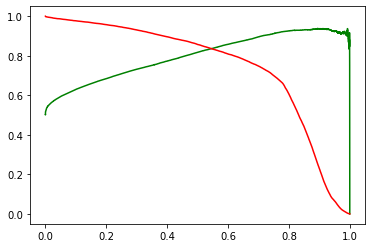

In [118]:
## Precision and Recall
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Prediction on TEST set

In [119]:
# Scaling the test data
X_test[numeric_col] = scaler.transform(X_test[numeric_col])
X_test.head()

offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
5222       0.062212            0.0       0.000000            0.0   
95306      0.012859            0.0       0.000000            0.0   
14779      0.075659            0.0       0.015352            0.0   
11458      0.002575            0.0       0.000000            0.0   
21349      0.087225            0.0       0.000000            0.0   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
5222             0.0       0.000000            0.0          0.001681   
95306            0.0       0.000000            0.0          0.000930   
14779            0.0       0.092043            0.0          0.003111   
11458            0.0       0.000000            0.0          0.001808   
21349            0.0       0.000000            0.0          0.000000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
5222           0.000332          0.000000          0.007313          0.008703   
95306          0.001374          0.000522          0.022735          0.015139   
14779          0.001060          0.001408          0.027536          0.018325   
11458          0.000644          0.001229          0.000759          0.002499   
21349          0.000077          0.000065          0.000873          0.005367   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
5222           0.000546          0.000000          0.000000          0.000782   
95306          0.018912          0.000000          0.000000          0.000000   
14779          0.024995          0.000566          0.000000          0.001615   
11458          0.006234          0.012230          0.000251          0.007581   
21349          0.001121          0.000000          0.000000          0.000000   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
5222           0.001768               0.0               0.0      0.004267   
95306          0.000000               0.0               0.0      0.010665   
14779          0.006852               0.0               0.0      0.014196   
11458          0.000000               0.0               0.0      0.003116   
21349          0.000000               0.0               0.0      0.000388   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
5222       0.005618      0.000288          0.043594          0.039631   
95306      0.010536      0.009007          0.000000          0.000000   
14779      0.012175      0.012691          0.045477          0.014528   
11458      0.002180      0.004403          0.000000          0.000000   
21349      0.003342      0.000567          0.011024          0.003947   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
5222           0.092385          0.048063          0.059570          0.011017   
95306          0.000000          0.000000          0.000106          0.000187   
14779          0.003032          0.060103          0.026569          0.025304   
11458          0.000000          0.000000          0.000362          0.000000   
21349          0.002784          0.087228          0.118168          0.052923   

       std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
5222           0.136073          0.003929          0.023815      0.095614   
95306          0.000000          0.000000          0.000000      0.000000   
14779          0.000000          0.000000          0.000000      0.098987   
11458          0.000000          0.000000          0.000000      0.000000   
21349          0.000000          0.000000          0.000000      0.095635   

       std_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
5222       0.079697           0.0      0.000892      0.000000      0.000000   
95306      0.000090           0.0      0.000000      0.000000      0.029155   
14779      0.033162           0.0      0.008887      0.003092      0.010453   
11458      0.000307    

In [120]:
# Feature selection
X_test=X_test[rfe_columns_3]
X_test.head()

roam_og_mou_7  loc_og_mou_8  std_og_t2f_mou_8  total_og_mou_7  \
5222        0.000000      0.000288          0.023815        0.080392   
95306       0.000000      0.009007          0.000000        0.007024   
14779       0.092043      0.012691          0.000000        0.040235   
11458       0.000000      0.004403          0.000000        0.001732   
21349       0.000000      0.000567          0.000000        0.101510   

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
5222         0.064773          0.000000          0.001613            0.0000   
95306        0.008408          0.011576          0.428360            0.0000   
14779        0.037254          0.011124          0.055134            0.0026   
11458        0.003579          0.007696          0.014330            0.0043   
21349        0.054608          0.000000          0.000137            0.0000   

       total_ic_mou_7  spl_ic_mou_8  total_rech_num_6  total_rech_num_8  \
5222         0.013077      0.000000          0.009772          0.056122   
95306        0.235368      0.000000          0.009772          0.015306   
14779        0.022721      0.000000          0.084691          0.045918   
11458        0.015049      0.000000          0.048860          0.051020   
21349        0.002254      0.040128          0.032573          0.030612   

       total_rech_amt_6  total_rech_amt_7  last_day_rch_amt_8  vol_2g_mb_8  \
5222           0.029213          0.000000            0.040234     0.001045   
95306          0.007729          0.006991            0.029220     0.004884   
14779          0.018386          0.020503            0.011238     0.000000   
11458          0.008809          0.016884            0.005619     0.001148   
21349          0.015317          0.014330            0.000000     0.000000   

       vol_3g_mb_8  monthly_2g_8  monthly_3g_8  aug_vbc_3g  sep_vbc_3g  \
5222      0.024441           0.0           0.2    0.000000         0.0   
95306     0.000000           0.0           0.0    0.000000         0.0   
14779     0.000000           0.0           0.0    0.000000         0.0   
11458     0.054971           0.2           0.0    0.054423         0.0   
21349     0.000000           0.0           0.0    0.000000         0.0   

       total_rech_amt_data_8  
5222                0.007272  
95306               0.000550  
14779               0.000000  
11458               0.008350  
21349               0.000000

In [121]:
# Adding constant to the test model.
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)
print("\n The first five probability value of the prediction are:\n",y_test_pred[:5])


 The first five probability value of the prediction are:
 5222     0.192631
95306    0.000029
14779    0.385125
11458    0.160346
21349    0.579080
dtype: float64


In [122]:
y_pred = pd.DataFrame(y_test_pred)
y_pred=y_pred.rename(columns = {0:"Conv_prob"})
y_test_df = pd.DataFrame(y_test)
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

churn  Conv_prob
5222       0   0.192631
95306      0   0.000029
14779      0   0.385125
11458      0   0.160346
21349      0   0.579080

In [123]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

churn  Conv_prob  test_churn_pred
5222       0   0.192631                0
95306      0   0.000029                0
14779      0   0.385125                0
11458      0   0.160346                0
21349      0   0.579080                1

#### Metrics Evaluation

In [124]:
#printing all the metrics together
print("#################  ALL THE METRICS OF THE LOGISTIC REGRESSION MODEL DEFAULT #################################\n")


print_all_metrics(y_pred_final.churn, y_pred_final.test_churn_pred)

#################  ALL THE METRICS OF THE LOGISTIC REGRESSION MODEL DEFAULT #################################


The confusion matrix of the model is:
[[6903 1353]
 [ 143  587]]

The overall accuracy of the model is: 0.8335188070331627

Sensitivity =  0.8041095890410959
Specificity =  0.8361191860465116
False Positive Rate =  0.16388081395348839
Precision =  0.30257731958762885
True Negative Prediction Rate =  0.9797047970479705


As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer.


In [125]:
# calculating and storing these variables for the metrics comparison table
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_LR_Default = metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

# calculate the sensitivity
sensitivity_LR_Default = (TP / float(TP + FN))

# calculate the specificity
specificity_LR_Default = (TN / float(TN + FP))

print(accuracy_LR_Default)
print(sensitivity_LR_Default)
print(specificity_LR_Default)

0.8335188070331627
0.8041095890410959
0.8361191860465116


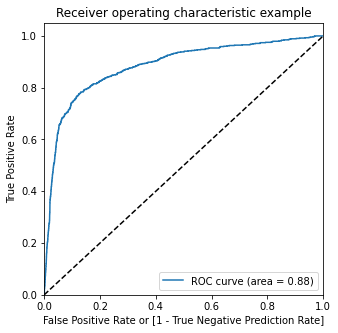

In [126]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

The AUC score for train dataset is 0.91 and the test dataset is 0.88. Hence, our model is a good Model.


### APPLYING PCA

In [127]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (20967, 122)
Dimension of X_test: (8986, 122)
Dimension of X_train_sm Shape: (38528, 122)
Dimension of y_train_sm Shape: (38528,)


offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0      0.080447       0.000000            0.0            0.0       0.000000   
1      0.000326       0.000000            0.0            0.0       0.000000   
2      0.017060       0.009602            0.0            0.0       0.004935   
3      0.021631       0.000000            0.0            0.0       0.000000   
4      0.007216       0.000000            0.0            0.0       0.000000   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0            0.0          0.000000          0.000000   
1            0.0            0.0          0.000141          0.000000   
2            0.0            0.0          0.004309          0.006591   
3            0.0            0.0          0.019383          0.007712   
4            0.0            0.0          0.005918          0.000000   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0          0.000000          0.000706          0.014467          0.005630   
1          0.000000          0.000531          0.000836          0.000939   
2          0.007169          0.004605          0.010169          0.012493   
3          0.006823          0.033080          0.018779          0.029111   
4          0.000000          0.011320          0.000233          0.000000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0          0.000177          0.000443          0.000000          0.026452   
1          0.000000          0.000000          0.000000          0.004347   
2          0.002019          0.001680          0.001037          0.000000   
3          0.001999          0.005801          0.005592          0.000000   
4          0.000000          0.000000          0.000000          0.000663   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0          0.002773          0.009362      0.000339      0.008881   
1          0.007565          0.004450      0.000322      0.000509   
2          0.000000          0.046315      0.004929      0.012773   
3          0.000000          0.032338      0.026689      0.019749   
4          0.008776          0.000000      0.008607      0.000142   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0      0.002530          0.000000          0.012728          0.014862   
1      0.000422          0.000273          0.000000          0.000000   
2      0.012653          0.016553          0.013999          0.008158   
3      0.020026          0.000548          0.000511          0.000000   
4      0.000000          0.105265          0.008914          0.001027   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0          0.080202          0.079134          0.031228               0.0   
1          0.000000          0.000000          0.000359               0.0   
2          0.012401          0.021264          0.005293               0.0   
3          0.002585          0.000979          0.000297               0.0   
4          0.000795          0.000000          0.000000               0.0   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0               0.0           0.00000      0.079078      0.076473   
1               0.0           0.00000      0.000238      0.000000   
2               0.0           0.00000      0.026688      0.028271   
3               0.0           0.00917      0.003029      0.001205   
4               0.0           0.00000      0.092738      0.006507   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0      0.000000      0.015877      0.001502      0.005172          0.0   
1      0.000000      0.009463      0.003830      0.002458          0.0   
2      0.000000      0.000000      0.000000      0.066486          0.0   
3      0.000675      0.000000      0.000000      0.017919          0.0   
4      0.000000      0.000335      0.009242      0.003369          0.0   

In [128]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [129]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38528, 122)
Dimension of X_test_pca:  (8986, 122)


In [130]:
#Viewing the PCA components
pca.components_

array([[ 4.55220448e-03, -1.11184713e-03, -1.65334313e-03, ...,
        -1.46358502e-02,  1.26245574e-01, -3.19148770e-04],
       [ 1.90332579e-03, -2.03127527e-03, -7.92320315e-04, ...,
         6.77375858e-01, -7.12967986e-01, -2.20230480e-04],
       [ 1.77644247e-02,  2.28541066e-03,  1.42238252e-03, ...,
        -2.15758898e-01, -1.09807965e-01, -7.83908591e-04],
       ...,
       [-7.10967262e-07, -4.23630516e-08, -1.54906067e-07, ...,
         7.86342561e-09,  8.39557431e-09, -5.27820594e-08],
       [-4.78763206e-07, -4.54909238e-08,  8.48181521e-08, ...,
         6.69177214e-12,  6.00033039e-09,  9.25713685e-09],
       [ 0.00000000e+00, -3.13934514e-16,  3.59477505e-16, ...,
         6.45988858e-18,  3.40718801e-18,  1.60576463e-17]])

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (8986, 1)


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA with all features: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6783 1473]
 [ 145  585]] 

Accuracy of the logistic regression model with PCA with all features:  0.8199421322056533


#### LOGISTIC ON PCA

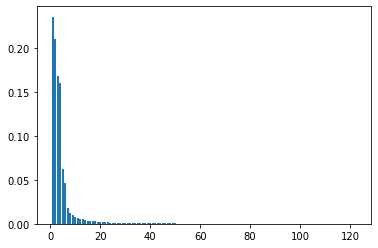

In [133]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

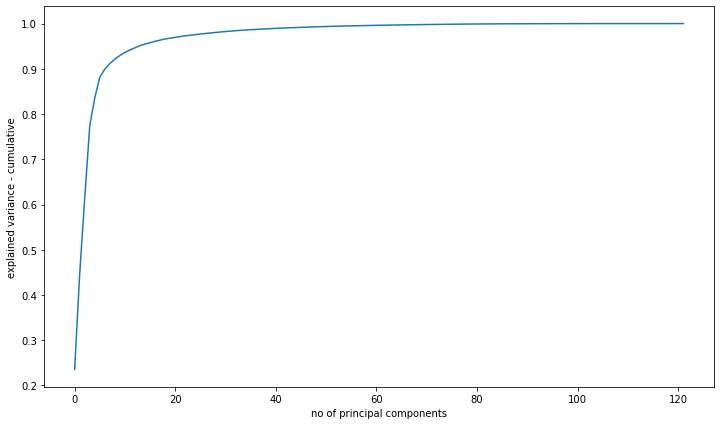

In [134]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [135]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.5, 44.5, 61.3, 77.3, 83.5, 88.1, 89.9, 91.1, 92.1, 92.9, 93.6,
       94.1, 94.6, 95.1, 95.4, 95.7, 96. , 96.3, 96.5, 96.7, 96.9, 97.1,
       97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.1, 99.1, 99.1,
       99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1,
       99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1,
       99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1,
       99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1,
       99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1,
       99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1,
       99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1, 99.1,
       99.1])

**WE CAN SEE THAT 95% OF THE VARIANCE CAN BE EXPLAINED BY USING 14 VARIABLES ONLY**

In [136]:
pca_14 = PCA(n_components=14)

train_pca_14 = pca_14.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_14.shape)

test_pca_14 = pca_14.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_14.shape)

Dimension for Train dataset using PCA:  (38528, 14)
Dimension for Test dataset using PCA:  (8986, 14)


In [137]:
logreg_pca_14 = LogisticRegression()
logreg_pca_14.fit(train_pca_14, y_train_sm)

# making the predictions
y_pred_14 = logreg_pca_14.predict(test_pca_14)

# converting the prediction into a dataframe
y_pred_df_14 = pd.DataFrame(y_pred_14)
print("Dimension of y_pred_df_8: ", y_pred_df_14.shape)

Dimension of y_pred_df_8:  (8986, 1)


In [138]:
#printing all the metrics together for Logistics after PCA
print("#################  ALL THE METRICS OF THE LOGISTIC REGRESSION MODEL WITH PCA 14 FEATURES ##########################\n")

print_all_metrics(y_test,y_pred_14)


#################  ALL THE METRICS OF THE LOGISTIC REGRESSION MODEL WITH PCA 14 FEATURES ##########################


The confusion matrix of the model is:
[[6212 2044]
 [ 188  542]]

The overall accuracy of the model is: 0.7516136211885155

Sensitivity =  0.7424657534246575
Specificity =  0.752422480620155
False Positive Rate =  0.24757751937984496
Precision =  0.20959010054137664
True Negative Prediction Rate =  0.970625


In [139]:
# calculating and storing these variables for the metrics comparison table

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_pred_14)
## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_LR_WithPCA = metrics.accuracy_score(y_test,y_pred_14)

# calculate the sensitivity
sensitivity_LR_WithPCA = (TP / float(TP + FN))

# calculate the specificity
specificity_LR_WithPCA = (TN / float(TN + FP))

print(accuracy_LR_WithPCA)
print(sensitivity_LR_WithPCA)
print(specificity_LR_WithPCA)

0.7516136211885155
0.7424657534246575
0.752422480620155


### DECISION TREE

In [140]:
## Importing random forest classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [141]:
## Applying SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38528, 122)
Dimension of y_train_sm Shape: (38528,)


In [142]:
# Fitting the PCA on train and test data
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38528, 122)
Dimension of X_test_pca:  (8986, 122)


Since we know the 95% of the variance were explained by the 14 variables. Lets apply Decision Tree with 14 features.

In [143]:
## Transforming with PCA

pca_14 = PCA(n_components=14)

train_pca_14 = pca_14.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_14.shape)

test_pca_14 = pca_14.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_14.shape)


Dimension for Train dataset using PCA:  (38528, 14)
Dimension for Test dataset using PCA:  (8986, 14)


In [144]:
## Applying Decision tree

dt_pca_14 = DecisionTreeClassifier()
dt_pca_14.fit(train_pca_14, y_train_sm)

# making the predictions
y_pred_14 = dt_pca_14.predict(test_pca_14)

# converting the prediction into a dataframe
y_pred_df_14 = pd.DataFrame(y_pred_14)
print("Dimension of y_pred_df_14: ", y_pred_df_14.shape)

Dimension of y_pred_df_14:  (8986, 1)


In [145]:
# Making predictions on test set
y_test_pred = dt_pca_14.predict(test_pca_14)

In [146]:
# Evaluating Metrics
print_all_metrics(y_test,y_test_pred)


The confusion matrix of the model is:
[[7032 1224]
 [ 362  368]]

The overall accuracy of the model is: 0.823503227242377

Sensitivity =  0.5041095890410959
Specificity =  0.8517441860465116
False Positive Rate =  0.14825581395348839
Precision =  0.23115577889447236
True Negative Prediction Rate =  0.9510413849066811


In [147]:
## Capturing Important Metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_test_pred)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_DT_default = metrics.accuracy_score(y_test,y_test_pred)

# calculate the sensitivity
sensitivity_DT_default = (TP / float(TP + FN))

# calculate the specificity
specificity_DT_default = (TN / float(TN + FP))

#### HYPERPARAMETER TUNING

In [148]:
## Importing KFold and GridSearchCV

from sklearn.model_selection import KFold,GridSearchCV

classifier_dt = DecisionTreeClassifier(random_state=42)

# params = {'max_depth' : [10,20,50],
#           'min_samples_leaf' : [5,10,20],
#           'max_features' : [5,10,14],
#           'n_estimators': [10,50,100,200]}

params = {'max_depth' : [20,50,100],
          'min_samples_leaf' : [5,10,20,50],
          'max_features' : [5,10,14],
          'min_samples_split' : [5,10,20],
          'criterion' : ['gini','entropy']}

grid_search = GridSearchCV(estimator=classifier_dt,
                             param_grid=params,
                             cv=4,
                             scoring='accuracy',
                             verbose=1,
                             n_jobs=-1)

In [149]:
## Fitting Grid Search
grid_search.fit(train_pca_14,y_train_sm)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 50, 100],
                         'max_features': [5, 10, 14],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [5, 10, 20]},
             scoring='accuracy', verbose=1)

In [150]:
## Best Estimator
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features=14,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [151]:
## Fitting with best Estimator
dt = DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features=14,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)
dt.fit(train_pca_14,y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features=14,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [152]:
## Making Predictions
y_test_pred = dt.predict(test_pca_14)

In [153]:
## Metrcis Evaluation
print_all_metrics(y_test,y_test_pred)


The confusion matrix of the model is:
[[6957 1299]
 [ 363  367]]

The overall accuracy of the model is: 0.815045626530158

Sensitivity =  0.5027397260273972
Specificity =  0.8426598837209303
False Positive Rate =  0.15734011627906977
Precision =  0.22028811524609843
True Negative Prediction Rate =  0.9504098360655737


In [154]:
## Capturing Important Metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_test_pred)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_DT_Tuned = metrics.accuracy_score(y_test,y_test_pred)

# calculate the sensitivity
sensitivity_DT_Tuned = (TP / float(TP + FN))

# calculate the specificity
specificity_DT_Tuned = (TN / float(TN + FP))

#### RANDOM FOREST

In [155]:
## Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [156]:
## Aplying SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)


Dimension of X_train_sm Shape: (38528, 122)
Dimension of y_train_sm Shape: (38528,)


In [157]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38528, 122)
Dimension of X_test_pca:  (8986, 122)


Since we know the 95% of the variance were explained by the 14 variables. Lets apply Random Forest with 14 features.

In [158]:
pca_14 = PCA(n_components=14)

train_pca_14 = pca_14.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_14.shape)

test_pca_14 = pca_14.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_14.shape)

Dimension for Train dataset using PCA:  (38528, 14)
Dimension for Test dataset using PCA:  (8986, 14)


In [159]:
## Applying Random Forest

rfc_pca_14 = RandomForestClassifier()
rfc_pca_14.fit(train_pca_14, y_train_sm)

# making the predictions
y_pred_14 = rfc_pca_14.predict(test_pca_14)

# converting the prediction into a dataframe
y_pred_df_14 = pd.DataFrame(y_pred_14)
print("Dimension of y_pred_df_14: ", y_pred_df_14.shape)

Dimension of y_pred_df_14:  (8986, 1)


In [160]:
# Making predictions
y_pred = rfc_pca_14.predict(test_pca_14)

In [161]:
## Evaluating Metrics
print_all_metrics(y_test,y_pred_14)


The confusion matrix of the model is:
[[7454  802]
 [ 332  398]]

The overall accuracy of the model is: 0.8738036946361006

Sensitivity =  0.5452054794520548
Specificity =  0.9028585271317829
False Positive Rate =  0.09714147286821706
Precision =  0.33166666666666667
True Negative Prediction Rate =  0.9573593629591575


In [162]:
## Capturing Important Metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_pred_14)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_RF_default = metrics.accuracy_score(y_test,y_pred_14)

# calculate the sensitivity
sensitivity_RF_default = (TP / float(TP + FN))

# calculate the specificity
specificity_RF_default = (TN / float(TN + FP))

#### Hyperparameter Tuning

In [163]:
from sklearn.model_selection import KFold,GridSearchCV

classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1)


params = {'max_depth' : [20,50],
          'min_samples_leaf' : [5,10],
          'max_features' : [10,14],
          'n_estimators': [100,200]}

grid_search = GridSearchCV(estimator=classifier_rf,
                             param_grid=params,
                             cv=4,
                             scoring='accuracy',
                             verbose=1,
                             n_jobs=-1)

In [164]:
grid_search.fit(train_pca_14,y_train_sm)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 50], 'max_features': [10, 14],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [165]:
## Getting best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=50, max_features=10, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [166]:
# Building Random forest model with best estimators
rfc = RandomForestClassifier(max_depth=50, max_features=10, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
rfc.fit(train_pca_14,y_train_sm)


RandomForestClassifier(max_depth=50, max_features=10, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [167]:
# Making predictions
y_pred = rfc.predict(test_pca_14)

In [168]:
## Evaluating Metrics
print_all_metrics(y_test,y_pred)


The confusion matrix of the model is:
[[7306  950]
 [ 296  434]]

The overall accuracy of the model is: 0.8613398620075673

Sensitivity =  0.5945205479452055
Specificity =  0.8849321705426356
False Positive Rate =  0.11506782945736434
Precision =  0.31358381502890176
True Negative Prediction Rate =  0.9610628781899501


In [169]:
## Capturing Important Metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_pred)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_RF_Tuned = metrics.accuracy_score(y_test,y_pred)

# calculate the sensitivity
sensitivity_RF_Tuned = (TP / float(TP + FN))

# calculate the specificity
specificity_RF_Tuned = (TN / float(TN + FP))

### XGBOOST

In [226]:
# In case XGBoost is uninstalled pease uncomment the below lines and install XGBoost
# pip install xgboost
# conda install py-xgboost
# conda install -c conda-forge xgboost=0.6a2

In [173]:
## Importing Libraries for XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [174]:
#Handling class imbalance

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)


Dimension of X_train_sm Shape: (38528, 122)
Dimension of y_train_sm Shape: (38528,)


In [175]:
#PCA
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38528, 122)
Dimension of X_test_pca:  (8986, 122)


Since we know the 95% of the variance were explained by the 14 variables. Lets apply Random Forest with 14 features.

In [176]:
pca_14 = PCA(n_components=14)

train_pca_14 = pca_14.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_14.shape)

test_pca_14 = pca_14.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_14.shape)

Dimension for Train dataset using PCA:  (38528, 14)
Dimension for Test dataset using PCA:  (8986, 14)


In [177]:
## Modelling with XGBoost

rfc_pca_14 = XGBClassifier()
rfc_pca_14.fit(train_pca_14, y_train_sm)

# making the predictions
y_pred_14 = rfc_pca_14.predict(test_pca_14)

# converting the prediction into a dataframe
y_pred_df_14 = pd.DataFrame(y_pred_14)
print("Dimension of y_pred_df_14: ", y_pred_df_14.shape)

[23:58:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Dimension of y_pred_df_14:  (8986, 1)


In [178]:
# Making predictions
y_pred = rfc_pca_14.predict(test_pca_14)

In [179]:
## Evaluating Metrics
print_all_metrics(y_test,y_pred)


The confusion matrix of the model is:
[[7032 1224]
 [ 273  457]]

The overall accuracy of the model is: 0.8334075228132651

Sensitivity =  0.626027397260274
Specificity =  0.8517441860465116
False Positive Rate =  0.14825581395348839
Precision =  0.27186198691255203
True Negative Prediction Rate =  0.9626283367556469


In [180]:
## Capturing Important Metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_pred)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_XG_default = metrics.accuracy_score(y_test,y_pred)

# calculate the sensitivity
sensitivity_XG_default = (TP / float(TP + FN))

# calculate the specificity
specificity_XG_default = (TN / float(TN + FP))

In [181]:
# hyperparameter tuning with XGBoost
from sklearn.model_selection import KFold,GridSearchCV

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

In [182]:
# fit the model
model_cv.fit(train_pca_14,y_train_sm)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[23:59:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [183]:
## Best Estimator
model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
# Building XGBoost model with best estimators
xgb = XGBClassifier(n_estimators=200,max_depth=2,learning_rate=0.3,subsample=0.4,n_jobs=8,random_state=42)
xgb.fit(X_train_sm_pca,y_train_sm)

[23:59:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [185]:
# Making predictions
y_pred = xgb.predict(X_test_pca)

In [186]:
## Evaluating Metrics
print_all_metrics(y_test,y_pred)


The confusion matrix of the model is:
[[7403  853]
 [ 222  508]]

The overall accuracy of the model is: 0.8803694636100601

Sensitivity =  0.6958904109589041
Specificity =  0.8966812015503876
False Positive Rate =  0.1033187984496124
Precision =  0.3732549595885378
True Negative Prediction Rate =  0.9708852459016394


In [187]:
## Capturing Important Metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_pred)

## Other Metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#calculate the accuracy
accuracy_XG_Tuned = metrics.accuracy_score(y_test,y_pred)

# calculate the sensitivity
sensitivity_XG_Tuned = (TP / float(TP + FN))

# calculate the specificity
specificity_XG_Tuned = (TN / float(TN + FP))

### COMPARING ALL MODELS

In [221]:
## Creating tables to evaluate model metrics

metrics_comparison_table = pd.DataFrame({'Model':['Logistic with PCA','Decision Tree With PCA',
                                                  'Decision Tree With PCA and Tuned','Random Forest with PCA',
                                                  'Random Forest with PCA and Tuned','XGBoost with PCA',
                                                  "XGBoost with PCA and Tuned"],
                                        "Accuracy":[accuracy_LR_WithPCA,accuracy_DT_default,accuracy_DT_Tuned,accuracy_RF_default,
                                                    accuracy_RF_Tuned,accuracy_XG_default,
                                                    accuracy_XG_Tuned],
                                        "Sensitivity":[sensitivity_LR_WithPCA,sensitivity_DT_default,sensitivity_DT_Tuned,
                                                       sensitivity_RF_default,sensitivity_RF_Tuned,
                                                       sensitivity_XG_default,sensitivity_XG_Tuned],
                                        "Specificity":[specificity_LR_WithPCA,specificity_DT_default,specificity_DT_Tuned,
                                                       specificity_RF_default,specificity_RF_Tuned,
                                                       specificity_XG_default,specificity_XG_Tuned]})

#rounding off the column values
metrics_comparison_table.Accuracy = metrics_comparison_table.Accuracy.round(2)
metrics_comparison_table.Sensitivity = metrics_comparison_table.Sensitivity.round(2)
metrics_comparison_table.Specificity = metrics_comparison_table.Specificity.round(2)

#print metrics
metrics_comparison_table


Model  Accuracy  Sensitivity  Specificity
0                 Logistic with PCA      0.75         0.74         0.75
1            Decision Tree With PCA      0.82         0.49         0.85
2  Decision Tree With PCA and Tuned      0.82         0.50         0.84
3            Random Forest with PCA      0.87         0.54         0.90
4  Random Forest with PCA and Tuned      0.86         0.59         0.88
5                  XGBoost with PCA      0.83         0.63         0.85
6        XGBoost with PCA and Tuned      0.88         0.70         0.90

**MODEL FOR PREDICTING CHURN - XGBOOST with PCA(Tuned)**

**Considering Accuracy and Sensitivity from the above table, since predicting churn was more important, we can go with XGBoost with PCA(Tuned) for predicting churn. Hence,XGBoost is the best model for this case study.**

### Finding Significant Features

In [222]:
Most_significant_features =pd.DataFrame(res.params,columns=['Coeff']).reset_index()
Most_significant_features['Correlation_Sign'] = np.where(Most_significant_features.Coeff<0,"Negative","Positive")
Most_significant_features.head()

index      Coeff Correlation_Sign
0             const   1.190352         Positive
1     roam_og_mou_7   4.871354         Positive
2      loc_og_mou_8 -13.490909         Negative
3  std_og_t2f_mou_8 -11.789347         Negative
4    total_og_mou_7   7.259874         Positive

In [223]:
# Taking absolute values to check significance order
Most_significant_features.Coeff = abs(Most_significant_features.Coeff)

In [224]:
Most_significant_features = Most_significant_features.sort_values(by='Coeff',ascending=False)

In [225]:
Most_significant_features

index      Coeff Correlation_Sign
21             sep_vbc_3g  80.401384         Negative
22  total_rech_amt_data_8  56.352431         Negative
7        loc_ic_t2m_mou_8  28.319328         Negative
8        loc_ic_t2f_mou_8  25.659772         Negative
5          total_og_mou_8  21.065813         Negative
6        loc_ic_t2t_mou_8  21.055531         Negative
10           spl_ic_mou_8  18.110705         Negative
13       total_rech_amt_6  17.225733         Positive
16            vol_2g_mb_8  14.056439         Negative
2            loc_og_mou_8  13.490909         Negative
15     last_day_rch_amt_8  13.300372         Negative
3        std_og_t2f_mou_8  11.789347         Negative
14       total_rech_amt_7  10.665611         Positive
12       total_rech_num_8   8.597334         Negative
4          total_og_mou_7   7.259874         Positive
20             aug_vbc_3g   6.429384         Negative
9          total_ic_mou_7   5.852084         Positive
18           monthly_2g_8   5.374320         Negative
1           roam_og_mou_7   4.871354         Positive
17            vol_3g_mb_8   3.841162         Negative
11       total_rech_num_6   3.489025         Positive
19           monthly_3g_8   2.950027         Negative
0                   const   1.190352         Positive

We notice that the following factors affect the churn rate considerably -

1. Volume based cost in September - when no specific scheme is not purchased and paid as per usage
2. Total Recharge Amount of the data for month 8
3. Local Incoming Calls from different operators in the month 8
4. Local Incoming Calls from fixed lines in the month 8
5. Total Outgoing Calls in the month 8

### RECOMMENDATION

- Less number of **high value customer** are churning but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

- Less Local Outgoing calls made to same operator, different operator and fixedline serves as a strong indicator of churn behaviour. This behaviour can be tracked and Customers should be given attention and appropriate actions to retain them should be taken accordingly.

- Lesser Volume consumed in month of September which in turn would have reduced the Usage based cost, this plays a key role in identifying the churn behaviour of the customer.Attractive offers should be provided to the cutomers for retention.

- Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.It highly affects the customer retention as the customers will always want to move to 3g from 2g.Hence better plans can be offered.

- We see a decreasing trend was observed in the number of recharge,total recharge amount, average recharge amount,maximum recharge amount and total recharge data in month 8th for the customers who churned.The company should  concentrate more on that segment by rolling out new schems to those customers.